# Import libraries and setup

In [1]:
# Import libraries we may need
import scanpy as sc
import numpy as np
import scipy as sp
import squidpy as sq
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib import colors
import seaborn as sb
import scanpy.external as sce
import wget
import yaml
import wget
import astir
import dill
import umap
reducer = umap.UMAP()
import anndata as ad

#My module for importing IMC data into AnnData format
import mikeimc as mimc
import mikeimc_v2 as mikeimc_v2

/Users/joaoluizsfilho/opt/anaconda3/envs/Squidpy/lib/python3.9/site-packages/geopandas/_compat.py:124: UserWarning: The Shapely GEOS version (3.11.1-CAPI-1.17.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(
/Users/joaoluizsfilho/opt/anaconda3/envs/Squidpy/lib/python3.9/site-packages/spatialdata/__init__.py:9: UserWarning: Geopandas was set to use PyGEOS, changing to shapely 2.0 with:

	geopandas.options.use_pygeos = True

If you intended to use PyGEOS, set the option to False.
  _check_geopandas_using_shapely()
/Users/joaoluizsfilho/opt/anaconda3/envs/Squidpy/lib/python3.9/site-packages/numba/np/ufunc/parallel.py:371: NumbaWarning: The TBB threading layer requires TBB version 2021 update 6 or later i.e., TBB_INTERFACE_VERSION >= 12060. Found TBB_INTERFACE_VERSION = 12050. The TBB threading layer is disabled.
  warnings.warn(problem)
OMP: Info #276: omp_set_nested routine deprecated, please u

In [2]:
# Set up output figure settings
plt.rcParams['figure.figsize']=(64,64) #rescale figures, increase sizehere

# Set up scanpy settings
sc.settings.verbosity = 3
sc.set_figure_params(dpi=100, dpi_save=300) #Increase DPI for better resolution figures
#sc.logging.print_versions()

# Save / restore adatas


In [ ]:
# load adata
import anndata as ad
adata_subset2 = ad.read_h5ad('./2_h5ad files/adata_subset2')

In [ ]:
# save
adata_subset2.write('./2_h5ad files/adata_subset2')

In [ ]:
adata_subset2

In [ ]:
adata_subset2.obs

# SCANPY - clustering analysis including functional markers

In [ ]:
#including functional markers
neutrophil_markers = ['Arginase1','CD11b', 'CD11c', 'CD14', 'CD16', 'CD163', 'CD206', 'CD45', 'CD66b', 'CD68', 'Iba1', 'CD74', 'MHCII', 'MHCI', 'Vista', 
                   'iNOS', 'CD38','CD107a', 'GranzymeB', 'Ki67', 'ClvdCaspase3', 'SARSCoV2']
adata_neutrophil_2 = adata_neutrophil[:,neutrophil_markers].copy()

macrophage_markers = ['Arginase1','CD11b', 'CD11c', 'CD14', 'CD16', 'CD163', 'CD206', 'CD45', 'CD66b', 'CD68', 'Iba1', 'CD74', 'MHCII', 'MHCI', 'Vista', 
                   'iNOS', 'CD38', 'CD107a', 'GranzymeB', 'Ki67', 'ClvdCaspase3', 'SARSCoV2']
adata_macrophage_2 = adata_macrophage[:,macrophage_markers].copy()

lymphoid_markers = ['CD3','CD4','CD8', 'CD11c', 'CD16','CD20','CD38', 'CD45RO', 'CD74','MHCI','MHCII','Foxp3','CD107a','GranzymeB','Ki67','ClvdCaspase3', 'Vista','SARSCoV2']
adata_lymphoid_2 = adata_lymphoid[:,lymphoid_markers].copy()

epithelial_markers = ['PanCK','CD74','MHCII','MHCI','CD107a','GranzymeB','Ki67','ClvdCaspase3','SARSCoV2']
adata_epithelial_2 = adata_epithelial[:,epithelial_markers].copy()

stromal_markers = ['Collagen1','SMA', 'Ki67','ClvdCaspase3','SARSCoV2']
adata_stromal = adata_stromal[:,stromal_markers].copy()

endothelial_markers = ['CD31','ICAM1','vWF','CD74','MHCII','MHCI','CD107a','GranzymeB','Ki67','ClvdCaspase3','SARSCoV2']
adata_endothelium_2 = adata_endothelium[:,endothelial_markers].copy()

RBC_markers = ['CD235ab','SARSCoV2']
adata_RBC_2 = adata_RBC[:,RBC_markers].copy()

# Analysis of Neutrophils

In [ ]:
adata_neutrophil_2 = ad.read_h5ad('./2_h5ad files/adata_neutrophil_2')

In [ ]:
adata_neutrophil_2

In [ ]:
#Use BBKNN integration instead of calculating neighbors 
# Define the number of PCA dimensions to work with - one less than number of markers. Without this, it usually defaults to 50, which we don't have enough markers for.
n_for_pca = len(adata_neutrophil_2.var_names)-1

# Define the 'obs' which defines the different cases
batch_correction_obs = 'Group'

# Calculate PCA, this must be done before BBKNN
sc.tl.pca(adata_neutrophil_2, n_comps=n_for_pca)

# BBKNN - it is used in place of the scanpy 'neighbors' command that calculates nearest neighbours in the feature space
sc.external.pp.bbknn(adata_neutrophil_2, batch_key='Group', n_pcs=n_for_pca)

In [ ]:
#Calculate neighbors - use harmony here instead
#sc.pp.neighbors(adata_neutrophil_2, n_neighbors=100)

In [ ]:
#Calculate UMAP - changed after running paga - see below
sc.tl.umap(adata_neutrophil_2)

In [ ]:
#Plot UMAP
sc.pl.umap(adata_neutrophil_2, size=5, color=['TMAID'], save='_neutrophil_TMAID.png')

In [ ]:
#Plot UMAP for each marker
sc.pl.umap(adata_neutrophil_2, size=5, cmap='viridis', color=['Arginase1','CD11b', 'CD11c', 'CD14', 'CD16', 'CD163', 'CD206', 'CD45', 'CD66b', 'CD68', 'Iba1', 'CD74', 'MHCII', 'MHCI', 'Vista', 
                   'iNOS', 'CD38','CD107a', 'GranzymeB', 'Ki67', 'ClvdCaspase3', 'SARSCoV2'], save='_neutrophil_Markers.png')

In [ ]:
#Run PCA
#sc.tl.pca(adata_neutrophil_2)

#Calculate tSNE
#sc.tl.tsne(adata_neutrophil_2)

In [ ]:
#Run PhenoGraph
sce.tl.phenograph(adata_neutrophil_2, clustering_algo="louvain", k=200, seed=1234)

In [ ]:
#Plot PhenoGraph on UMAP
sc.pl.umap(adata_neutrophil_2, color = "pheno_louvain", legend_fontsize = 10, size=5, save='_neutrophil_PhenoLouvain.png')

In [ ]:
#Plot heatmap of myeloid clusters
sc.tl.dendrogram(adata_neutrophil_2, groupby = 'pheno_louvain')
sc.pl.heatmap(adata_neutrophil_2, adata_neutrophil_2.var_names, cmap="viridis", groupby='pheno_louvain', swap_axes=True, dendrogram=True, save='_neutrophil_PhenoLouvain_clustered.png')

In [ ]:
#Plot scaled heatmap
adata_neutrophil_norm = adata_neutrophil_2.copy()
sc.pp.scale(adata_neutrophil_norm, max_value=2,  zero_center=True)
sc.tl.dendrogram(adata_neutrophil_norm, groupby = 'pheno_louvain')
sc.pl.heatmap(adata_neutrophil_norm, adata_neutrophil_norm.var_names, groupby='pheno_louvain', swap_axes=True, dendrogram=True, save='_scaled_neutrophil_PhenoLouvain_clustered.png')

In [ ]:
#Compute a ranking for the highly differential markers in each cluster
#differential testing using t-test,  Wilcoxon rank-sum (Mann-Whitney-U) or logistic regression 
#The essential difference is that here, we use a multi-variate approach whereas conventional differential tests are uni-variate. 
sc.tl.rank_genes_groups(adata_neutrophil_2, 'pheno_louvain', reference='rest', method='wilcoxon', corr_method='benjamini-hochberg', pts=True)
sc.pl.rank_genes_groups(adata_neutrophil_2, n_genes=10, sharey=False, save='rank_markers_neutrophil_PhenoLouvain.png')

In [ ]:
#Get a table with the scores and groups. see p-values
result = adata_neutrophil_2.uns['rank_genes_groups']
groups = result['names'].dtype.names
pd.DataFrame(
    {group + '_' + key[:1]: result[key][group]
    for group in groups for key in ['names', 'pvals']}).head(10)

# Mapping neutrophil clusters after annotation and merging

In [ ]:
adata_neutrophil_2

In [ ]:
#Annotate clusters in a dictionary file
#Load the merged clusters and map to the anndata file

# Mapping the phenograph populations onto the new/merged population labels

neutrophil_dict = pd.read_csv('mikeimc_approach/Dictionaries/covid_neutrophil_dict.csv')
n = neutrophil_dict.set_index('pheno_louvain').to_dict()

adata_neutrophil_2.obs['neutrophil_pop']=adata_neutrophil_2.obs['pheno_louvain'].map(n['Neutrophil_Class'])
adata_neutrophil_2.obs['neutrophil_pop']=adata_neutrophil_2.obs['neutrophil_pop'].astype('category')

In [ ]:
#Plot heatmap of all clusters
sc.tl.dendrogram(adata_neutrophil_2, groupby = 'neutrophil_pop')

In [ ]:
sc.pl.matrixplot(adata_neutrophil_2, adata_neutrophil_2.var_names, groupby='neutrophil_pop', vmax=0.75, dendrogram=True, save=True)


In [ ]:
#Spatial mapping of the annotated neutrophil clusters
graph = sb.lmplot(data = adata_neutrophil_2.obs, x = 'X_loc',y='Y_loc',hue ='neutrophil_pop',palette = 'bright',height = 8,col = 'ROI',col_wrap = 10,fit_reg = False)
graph.savefig("MappedPlots_neutrophil_clusters.png")

In [ ]:
#Plot heatmap of neutrophil clusters
sc.tl.dendrogram(adata_neutrophil_2, groupby = 'neutrophil_pop')
sc.pl.heatmap(adata_neutrophil_2, adata_neutrophil_2.var_names, groupby='neutrophil_pop', cmap='viridis', swap_axes=False, dendrogram=True, save='_neutrophil_annotated_clustered.png')

In [ ]:
#Plot scaled heatmap
adata_myeloid_norm3 = adata_neutrophil_2.copy()
sc.pp.scale(adata_myeloid_norm3, max_value=2,  zero_center=True)
sc.tl.dendrogram(adata_myeloid_norm3, groupby = 'neutrophil_pop')
sc.pl.heatmap(adata_myeloid_norm3, adata_myeloid_norm3.var_names, groupby='neutrophil_pop', swap_axes=False, dendrogram=True, save='_scaled_neutrophil_annotated_clustered.png')


In [ ]:
#Compute a ranking for the highly differential markers in each cluster
#To identify differentially expressed genes we run sc.tl.rank_genes_groups. 
#This function will take each group of cells and compare the distribution of each gene in a group against the distribution in all other cells not in the group. 
sc.tl.rank_genes_groups(adata_neutrophil_2, 'neutrophil_pop', reference='rest', method='wilcoxon', corr_method='benjamini-hochberg', pts=True)

In [ ]:
sc.pl.rank_genes_groups(adata_neutrophil_2, n_genes=10, sharey=False, save='neutrophil_annotated_wilcoxon.png')

In [ ]:
adata_neutrophil_2.uns['rank_genes_groups']

In [ ]:
#Get a table with the scores and groups. see p-values
result = adata_neutrophil_2.uns['rank_genes_groups']
groups = result['names'].dtype.names
df = pd.DataFrame(
    {group + '_' + key[:1]: result[key][group]
    for group in groups for key in ['names', 'pvals_adj', 'scores','logfoldchanges']}).head(20)
df

In [ ]:
compression_opts = dict(method='zip',
                         archive_name='Rank_markers_neutrophil_annotated_clusters.csv') 
df.to_csv('Rank_markers_neutrophil_annotated_clusters.zip', index=True, compression=compression_opts)

In [ ]:
sc.pl.rank_genes_groups_violin(adata_neutrophil_2, n_genes=5, save='top5_DE_markers_wilcoxon.png')

In [ ]:
sc.pl.rank_genes_groups_violin(adata_neutrophil_2, split=False, groups=['SARSCoV2+ ArginaseHighVISTAHigh Activated Neutrophil'], gene_names=['ClvdCaspase3'], save='ClvdCaspase3_expression_wilcoxon.png')

In [ ]:
sc.pl.rank_genes_groups_violin(adata_neutrophil_2, groups=['Virus-infected Alveolar Macrophage'], split=True, gene_names=['SARSCoV2','MHCI', 'MHCII', 'CD74', 'CD107a', 'GranzymeB', 'Arginase1', 'iNOS']) 

In [ ]:
sc.pl.rank_genes_groups_heatmap(adata_neutrophil_2, n_genes=5,use_raw=False, swap_axes=True, show_gene_labels=True,
                                cmap='bwr', save='neutrophil_heatmap_wilcoxon.png')

In [ ]:
sc.pl.rank_genes_groups_matrixplot(adata_neutrophil_2, n_genes=5, values_to_plot='logfoldchanges', swap_axes=True, cmap='bwr', save='neutrophil_logFC_wilcoxon.png')



In [ ]:
sc.pl.rank_genes_groups_dotplot(adata_neutrophil_2, n_genes=5, values_to_plot='logfoldchanges', swap_axes=True, cmap='bwr', save='neutrophil_logFC_wilcoxon.png')



In [ ]:
sc.pl.rank_genes_groups_dotplot(adata_neutrophil_2, groups=['SARSCoV2+ ArginaseHighVISTAHigh Activated Neutrophil', 
                                                 'ArginaseHighVISTAHigh Activated Neutrophil', 'ArginaseLowVISTALow Neutrophil'], n_genes=8, values_to_plot='logfoldchanges', swap_axes=False, cmap='bwr', save='neutrophil_logFC_wilcoxon.pdf')



In [ ]:
sc.pl.rank_genes_groups_dotplot(adata_neutrophil_2, var_names=['SARSCoV2','MHCI', 'MHCII', 'CD74', 'ClvdCaspase3','CD107a', 'GranzymeB', 'iNOS', 'Arginase1', 'Vista'], values_to_plot='logfoldchanges', swap_axes=True, cmap='bwr', save='neutrophil_specificmarkers_logFC_wilcoxon.pdf')



In [ ]:
#virus_mac = sc.tl.rank_genes_groups(adata_myeloid_2, 'myeloid_pop', groups=['Virus-infected Alveolar Macrophage'], reference='Alveolar Macrophage', method='wilcoxon')
#sc.pl.rank_genes_groups_violin(virus_mac, groups=['Virus-infected Alveolar Macrophage'], n_genes=6)

In [ ]:
sc.pl.violin(adata_neutrophil_2, ['MHCI','iNOS', 'CD38', 'CD107a', 'GranzymeB', 'ClvdCaspase3'], groupby='neutrophil_pop', rotation=90, save='neutrophil_specificmarkers_wilcoxon.pdf')



In [ ]:
sc.pl.violin(adata_neutrophil_2, ['Ki67', 'ClvdCaspase3', 'iNOS', 'Arginase1', 'Vista'], groupby='neutrophil_pop', rotation=90, save='neutrophil_specificmarkers_wilcoxon_2.pdf')



In [ ]:
sc.pl.dotplot(adata_neutrophil_2, adata_neutrophil_2.var_names, groupby='neutrophil_pop', cmap='bwr', vmax=0.75, dendrogram=True)

In [ ]:
#Plot PhenoGraph on UMAP
sc.pl.umap(adata_neutrophil_2, color = "neutrophil_pop", legend_fontsize=12, legend_fontweight='semibold',legend_loc='right margin', frameon=True, save='_neutrophil_annotated.png')

#Plot PhenoGraph on tSNE
#sc.pl.tsne(adata_myeloid_2, color = "myeloid_pop", legend_fontsize = 6, legend_fontweight='semibold',legend_loc='on data', frameon=True, save='_myeloid_annotated.png')

# Frequency and absolute count graphs

In [ ]:
adata_neutrophil_2

In [ ]:
#stack bar code and extracting number of cells, distribution of each cluster per case or the cluster composition per case
#for number of cells - don't use normalize
#for distribution of each case per cluster - use normalize = "index"
#for cluster composition per case - use normalize = "columns"
tmp = pd.crosstab(adata_neutrophil_2.obs['neutrophil_pop'], adata_neutrophil_2.obs['HIV'], margins=False, margins_name='Total', normalize="columns")

In [ ]:
tmp

In [ ]:
tmp2 = tmp.reindex(['ArginaseLowVISTALow Neutrophil', 'GrBLowArginaseLowVISTALow Activated Neutrophil',
                    'GrBHighArginaseLowVISTALow Activated Neutrophil', 
                    'GrBHighArginaseHighVISTAHigh Activated Neutrophil',
                    'SARSCoV2+ ArginaseHighVISTAHigh Activated Neutrophil'])

In [ ]:
tmp2

In [ ]:
tmp3 = pd.DataFrame.transpose(tmp2)

In [ ]:
#color for stack bars for the disease groups matching the other bar graphs
#F08080 - light coral
#87CEFA - lightskyblue
#D3D3D3 - lightgrey

pretty_colors = ['#F08080','#87CEFA','#D3D3D3']
color_pal = sb.color_palette('Paired', 8)

tmp3.plot.bar(stacked=True,color=color_pal, figsize=(4, 4)).legend(bbox_to_anchor=(1, 1))

In [ ]:
compression_opts = dict(method='zip',
                         archive_name='Neutrophil_cluster_composition_per_ROI.csv') 
tmp3.to_csv('Neutrophil_cluster_composition_per_ROI.zip', index=True, compression=compression_opts)

Abundances graphs with stats Example of case averaging abundance stats

In [ ]:
# Alter this list with adata.obs variables that you want to plot against the resulting leiden population
image_var = 'ROI'

for i in ['Group']:

    mikeimc_v2.grouped_graph(adata_neutrophil_2,
                             ROI_id=image_var,
                             group_by_obs=i,
                             x_axis='neutrophil_pop',
                             fig_size=(4,4),
                             log_scale=False, scale_factor=True,
                            display_tables=True) #If you change display_tables to True, will also do stats on the groups
    plt.show()

In [ ]:
mikeimc_v2.pop_stats(adata_neutrophil_2,
          groups='Group', #The adata.obs we want to use to compare between
          Case_id='Patient', #The adata.obs that defines case
          ROI_id='ROI',
          x_axis='neutrophil_pop',
          display_tables=True,
          fig_size=(4,4),
          save='pop_stats_Group.png',
           log_scale=False
         )

In [ ]:
# Set `skip_data=False` if you also want to export the data.
adata_neutrophil_2.write_csvs(dirname='./Analysis/SCANPY/Neutrophil/Annotated clusters', skip_data=False)

In [ ]:
# Adding HIV status 
anno = pd.read_csv(filepath_or_buffer='./Analysis/SCANPY/Neutrophil/Annotated clusters/obs.csv', index_col=1)

In [ ]:
anno.index

In [ ]:
anno['HIV'].values

In [ ]:
adata_neutrophil_2.obs.index

In [ ]:
adata_neutrophil_2.obs['HIV'] = anno['HIV'].values

In [ ]:
adata_neutrophil_2.obs['HIV']

# Analysis of Macrophages

In [ ]:
adata_macrophage_2.obs['hierarchy']

In [ ]:
#Use BBKNN integration instead of calculating neighbors 
# Define the number of PCA dimensions to work with - one less than number of markers. Without this, it usually defaults to 50, which we don't have enough markers for.
n_for_pca = len(adata_macrophage_2.var_names)-1

# Define the 'obs' which defines the different cases
batch_correction_obs = 'Group'

# Calculate PCA, this must be done before BBKNN
sc.tl.pca(adata_macrophage_2, n_comps=n_for_pca)

# BBKNN - it is used in place of the scanpy 'neighbors' command that calculates nearest neighbours in the feature space
sc.external.pp.bbknn(adata_macrophage_2, batch_key='Group', n_pcs=n_for_pca)

In [ ]:
#Calculate UMAP - changed after running paga - see below
sc.tl.umap(adata_macrophage_2)

In [ ]:
#Plot UMAP
sc.pl.umap(adata_macrophage_2, size=5, color=['TMAID'], save='_macrophage_TMAID.png')

In [ ]:
#Plot UMAP for each marker
sc.pl.umap(adata_macrophage_2, size=5, cmap='viridis', color=['Arginase1','CD11b', 'CD11c', 'CD14', 'CD16', 'CD163', 'CD206', 'CD45', 'CD66b', 'CD68', 'Iba1', 'CD74', 'MHCII', 'MHCI', 'Vista', 
                   'iNOS', 'CD38','CD107a', 'GranzymeB', 'Ki67', 'ClvdCaspase3', 'SARSCoV2'], save='_macrophage_Markers.png')

In [ ]:
#Run PCA
#sc.tl.pca(adata_macrophage_2)

#Calculate tSNE
#sc.tl.tsne(adata_macrophage_2)

In [ ]:
#Run PhenoGraph
sce.tl.phenograph(adata_macrophage_2, clustering_algo="louvain", k=200, seed=1234)

In [ ]:
#Plot PhenoGraph on UMAP
sc.pl.umap(adata_macrophage_2, color = "pheno_louvain", legend_fontsize = 10, size=5, save='_macrophage_PhenoLouvain.png')

In [ ]:
#Plot heatmap of myeloid clusters
sc.tl.dendrogram(adata_macrophage_2, groupby = 'pheno_louvain')
sc.pl.heatmap(adata_macrophage_2, adata_macrophage_2.var_names, cmap="viridis", groupby='pheno_louvain', swap_axes=True, dendrogram=True, save='_macrophage_PhenoLouvain_clustered.png')

In [ ]:
#Plot scaled heatmap
adata_neutrophil_norm = adata_macrophage_2.copy()
sc.pp.scale(adata_neutrophil_norm, max_value=2,  zero_center=True)
sc.tl.dendrogram(adata_neutrophil_norm, groupby = 'pheno_louvain')
sc.pl.heatmap(adata_neutrophil_norm, adata_neutrophil_norm.var_names, groupby='pheno_louvain', swap_axes=True, dendrogram=True, save='_scaled_macrophage_PhenoLouvain_clustered.png')

In [ ]:
#Compute a ranking for the highly differential markers in each cluster
#differential testing using t-test,  Wilcoxon rank-sum (Mann-Whitney-U) or logistic regression 
#The essential difference is that here, we use a multi-variate approach whereas conventional differential tests are uni-variate. 
sc.tl.rank_genes_groups(adata_macrophage_2, 'pheno_louvain', reference='rest', method='wilcoxon', corr_method='benjamini-hochberg', pts=True)
sc.pl.rank_genes_groups(adata_macrophage_2, n_genes=10, sharey=False, save='rank_markers_macrophage_PhenoLouvain.png')

In [ ]:
#Get a table with the scores and groups. see p-values
result = adata_macrophage_2.uns['rank_genes_groups']
groups = result['names'].dtype.names
pd.DataFrame(
    {group + '_' + key[:1]: result[key][group]
    for group in groups for key in ['names', 'pvals']}).head(10)

# Mapping macrophage clusters after annotation and merging

In [ ]:
#Annotate clusters in a dictionary file
#Load the merged clusters and map to the anndata file

# Mapping the phenograph populations onto the new/merged population labels

myeloid_dict = pd.read_csv('mikeimc_approach/Dictionaries/covid_macrophage_dict.csv')
m = myeloid_dict.set_index('pheno_louvain').to_dict()

adata_macrophage_2.obs['macrophage_pop']=adata_macrophage_2.obs['pheno_louvain'].map(m['Myeloid_Class'])
adata_macrophage_2.obs['macrophage_pop']=adata_macrophage_2.obs['macrophage_pop'].astype('category')

In [ ]:
#Plot heatmap of all clusters
sc.tl.dendrogram(adata_macrophage_2, groupby = 'macrophage_pop')

In [ ]:
sc.pl.matrixplot(adata_macrophage_2, adata_macrophage_2.var_names, groupby='macrophage_pop', vmax=0.75, dendrogram=True, save=True)


In [ ]:
#Spatial mapping of the annotated myeloid clusters
graph = sb.lmplot(data = adata_macrophage_2.obs, x = 'X_loc',y='Y_loc',hue ='macrophage_pop',palette = 'bright',height = 8,col = 'ROI',col_wrap = 10,fit_reg = False)
graph.savefig("MappedPlots_macrophage_clusters.png")

In [ ]:
#Plot heatmap of myeloid clusters
sc.tl.dendrogram(adata_macrophage_2, groupby = 'macrophage_pop')
sc.pl.heatmap(adata_macrophage_2, adata_macrophage_2.var_names, groupby='macrophage_pop', cmap='viridis', swap_axes=False, dendrogram=True, save='_macrophage_annotated_clustered.png')

In [ ]:
#Compute a ranking for the highly differential markers in each cluster
#To identify differentially expressed genes we run sc.tl.rank_genes_groups. 
#This function will take each group of cells and compare the distribution of each gene in a group against the distribution in all other cells not in the group. 
sc.tl.rank_genes_groups(adata_macrophage_2, 'macrophage_pop', reference='rest', method='wilcoxon', corr_method='benjamini-hochberg', pts=True)

In [ ]:
sc.pl.rank_genes_groups(adata_macrophage_2, n_genes=10, sharey=False, save='macrophage_annotated_wilcoxon.png')

In [ ]:
#sc.tl.rank_genes_groups(adata_myeloid_3, 'Type', reference='Non_COVID', method='wilcoxon', corr_method='benjamini-hochberg', pts=True, )

In [ ]:
sc.pl.rank_genes_groups(adata_adata_macrophage_2, n_genes=10, sharey=False)

In [ ]:
adata_macrophage_2.uns['rank_genes_groups']

In [ ]:
#Get a table with the scores and groups. see p-values
result = adata_myeloid_2.uns['rank_genes_groups']
groups = result['names'].dtype.names
df = pd.DataFrame(
    {group + '_' + key[:1]: result[key][group]
    for group in groups for key in ['names', 'pvals_adj', 'scores','logfoldchanges']}).head(20)
df

In [ ]:
compression_opts = dict(method='zip',
                         archive_name='Rank_markers_myeloid_annotated_clusters.csv') 
df.to_csv('Rank_markers_myeloid_annotated_clusters.zip', index=True, compression=compression_opts)

In [ ]:
sc.pl.rank_genes_groups_violin(adata_myeloid_2, n_genes=5, save='top5_DE_markers_wilcoxon.png')

In [ ]:
sc.pl.rank_genes_groups_violin(adata_myeloid_2, split=False, groups=['Virus-infected Alveolar Macrophage'], gene_names=['ClvdCaspase3'], save='ClvdCaspase3_expression_wilcoxon.png')

In [ ]:
sc.pl.rank_genes_groups_violin(adata_myeloid_2, groups=['Virus-infected Alveolar Macrophage'], split=True, gene_names=['SARSCoV2','MHCI', 'MHCII', 'CD74', 'CD107a', 'GranzymeB', 'Arginase1', 'iNOS']) 

In [ ]:
sc.pl.rank_genes_groups_heatmap(adata_myeloid_2, n_genes=5,use_raw=False, swap_axes=True, show_gene_labels=True,
                                cmap='bwr', save='myeloid_heatmap_wilcoxon.png')

In [ ]:
sc.pl.rank_genes_groups_matrixplot(adata_myeloid_2, n_genes=5, values_to_plot='logfoldchanges', swap_axes=True, cmap='bwr', save='myeloid_logFC_wilcoxon.png' )

In [ ]:
sc.pl.rank_genes_groups_dotplot(adata_myeloid_2, n_genes=5, values_to_plot='logfoldchanges', swap_axes=True, cmap='bwr', save='myeloid_logFC_wilcoxon.png')

In [ ]:
sc.pl.rank_genes_groups_dotplot(adata_myeloid_2, groups=['Alveolar Macrophage', 
                                                 'Virus-infected Alveolar Macrophage', 'Interstitial Macrophage', 'Classical Monocyte'], n_genes=8, values_to_plot='logfoldchanges', swap_axes=True, cmap='bwr', save='macrophage_logFC_wilcoxon.pdf')

In [ ]:
sc.pl.dotplot(adata_myeloid_2, adata_myeloid_2.var_names, groupby='myeloid_pop', cmap='bwr', vmax=0.75, dendrogram=True)

In [ ]:
sc.pl.violin(adata_macrophage_2, ['MHCI', 'MHCII','iNOS', 'CD38', 'CD107a', 'GranzymeB', 'ClvdCaspase3'], groupby='macrophage_pop', rotation=90, save='macrophage_specificmarkers_wilcoxon.pdf')



In [ ]:
#Plot PhenoGraph on UMAP
sc.pl.umap(adata_macrophage_2, color = "macrophage_pop", legend_fontsize=12, legend_fontweight='semibold',legend_loc='right margin', frameon=True, save='_macrophage_annotated.png')

#Plot PhenoGraph on tSNE
#sc.pl.tsne(adata_myeloid_2, color = "myeloid_pop", legend_fontsize = 6, legend_fontweight='semibold',legend_loc='on data', frameon=True, save='_myeloid_annotated.png')

In [ ]:
#Plot UMAP for each marker
sc.pl.umap(adata_macrophage_2, color=adata_myeloid_2.var_names,size=5, cmap='viridis', vmax=1, save='_macrophage_Markers_v2.pdf')

# Frequency and absolute count graphs

In [ ]:
#stack bar code and extracting number of cells, distribution of each cluster per case or the cluster composition per case
#for number of cells - don't use normalize
#for distribution of each case per cluster - use normalize = "index"
#for cluster composition per case - use normalize = "columns"
tmp = pd.crosstab(adata_macrophage_2.obs['macrophage_pop'], adata_macrophage_2.obs['HIV'], margins=False, margins_name='Total', normalize="columns")

In [ ]:
tmp

In [ ]:
tmp2 = pd.DataFrame.transpose(tmp)

In [ ]:
#color for stack bars for the disease groups matching the other bar graphs
#F08080 - light coral
#87CEFA - lightskyblue
#D3D3D3 - lightgrey

pretty_colors = ['#F08080','#87CEFA','#D3D3D3']
color_pal = sb.color_palette('Paired', 8)

tmp2.plot.bar(stacked=True,color=color_pal, figsize=(4, 4)).legend(bbox_to_anchor=(1, 1))

In [ ]:
compression_opts = dict(method='zip',
                         archive_name='Neutrophil_cluster_composition_per_ROI.csv') 
tmp3.to_csv('Neutrophil_cluster_composition_per_ROI.zip', index=True, compression=compression_opts)

In [ ]:
# Alter this list with adata.obs variables that you want to plot against the resulting leiden population
image_var = 'ROI'

for i in ['Group']:

    mikeimc_v2.grouped_graph(adata_macrophage_2,
                             ROI_id=image_var,
                             group_by_obs=i,
                             x_axis='macrophage_pop',
                             fig_size=(4,4),
                             log_scale=False, scale_factor=True,
                            display_tables=True) #If you change display_tables to True, will also do stats on the groups
    plt.show()

In [ ]:
mikeimc_v2.pop_stats(adata_macrophage_2,
          groups='Group', #The adata.obs we want to use to compare between
          Case_id='Patient', #The adata.obs that defines case
          ROI_id='ROI',
          x_axis='macrophage_pop',
          display_tables=True,
          fig_size=(4,4),
          save='pop_stats_Group.png',
           log_scale=False
         )

In [ ]:
# Set `skip_data=False` if you also want to export the data.
adata_macrophage_2.write_csvs(dirname='./Analysis/SCANPY/Macrophage/Annotated clusters', skip_data=False)

In [ ]:
# Adding HIV status 
anno = pd.read_csv(filepath_or_buffer='./Analysis/SCANPY/Macrophage/Annotated clusters/obs.csv', index_col=1)

In [ ]:
anno.index

In [ ]:
anno['HIV'].values

In [ ]:
adata_macrophage_2.obs.index

In [ ]:
adata_macrophage_2.obs['HIV'] = anno['HIV'].values

In [ ]:
adata_macrophage_2.obs['HIV']

# Analysis of Lymhoid cells

In [ ]:
adata_lymphoid_2.obs['hierarchy']

In [ ]:
#Use BBKNN integration instead of calculating neighbors 
# Define the number of PCA dimensions to work with - one less than number of markers. Without this, it usually defaults to 50, which we don't have enough markers for.
n_for_pca = len(adata_lymphoid_2.var_names)-1

# Define the 'obs' which defines the different cases
batch_correction_obs = 'Group'

# Calculate PCA, this must be done before BBKNN
sc.tl.pca(adata_lymphoid_2, n_comps=n_for_pca)

# BBKNN - it is used in place of the scanpy 'neighbors' command that calculates nearest neighbours in the feature space
sc.external.pp.bbknn(adata_lymphoid_2, batch_key='Group', n_pcs=n_for_pca)

#Calculate UMAP
sc.tl.umap(adata_lymphoid_2)

In [ ]:
#Plot UMAP
sc.pl.umap(adata_lymphoid_2, size=5, color=['TMAID'], save='_lymphoid_TMAID.png')

In [ ]:
#Plot UMAP for each marker
sc.pl.umap(adata_lymphoid_2, color=adata_lymphoid_2.var_names, save='_lymphoid_Markers.png')

In [ ]:
#Run PCA
#sc.tl.pca(adata_lymphoid_2)

#Calculate tSNE
#sc.tl.tsne(adata_lymphoid_2)

In [ ]:
#Run PhenoGraph
sce.tl.phenograph(adata_lymphoid_2, clustering_algo="louvain", k=200, seed=1)

In [ ]:
#Plot PhenoGraph on UMAP
sc.pl.umap(adata_lymphoid_2, color = "pheno_louvain", legend_fontsize = 10, save='_lymphoid_PhenoLouvain.png')

In [ ]:
#Plot heatmap of lymphoidclusters
sc.tl.dendrogram(adata_lymphoid_2, groupby = 'pheno_louvain')
sc.pl.heatmap(adata_lymphoid_2, adata_lymphoid_2.var_names, groupby='pheno_louvain', swap_axes=True, dendrogram=True, save='_lymphoid_PhenoLouvain_clustered.png')

In [ ]:
#Plot scaled heatmap
adata_lymphoid_norm2 = adata_lymphoid_2.copy()
sc.pp.scale(adata_lymphoid_norm2, max_value=2,  zero_center=True)
sc.tl.dendrogram(adata_lymphoid_norm2, groupby = 'pheno_louvain')
sc.pl.heatmap(adata_lymphoid_norm2, adata_lymphoid_norm2.var_names, groupby='pheno_louvain', swap_axes=True, dendrogram=True, save='_scaled_lymphoid_PhenoLouvain_clustered.png')

In [ ]:
#Compute a ranking for the highly differential markers in each cluster
sc.tl.rank_genes_groups(adata_lymphoid_2, 'pheno_louvain', method='t-test')
sc.pl.rank_genes_groups(adata_lymphoid_2, n_genes=10, sharey=False, save='rank_markers_lymphoid_PhenoLouvain.png')

In [ ]:
#Population distribution

from importlib import reload

mimc = reload(mimc)
mimc.pop_distribution(adata_lymphoid_2,'pheno_louvain',['ROI'])

# Mapping lymphoid clusters after annotation and merging

In [ ]:
#Annotate clusters in a dictionary file
#Load the merged clusters and map to the anndata file

# Mapping the phenograph populations onto the new/merged population labels

lymphoid_dict = pd.read_csv('mikeimc_approach/Dictionaries/covid_lymphoid_dict.csv')
l = lymphoid_dict.set_index('pheno_louvain').to_dict()

adata_lymphoid_2.obs['lymphoid_pop']=adata_lymphoid_2.obs['pheno_louvain'].map(l['Lymphoid_Class'])

adata_lymphoid_2.obs['lymphoid_pop']=adata_lymphoid_2.obs['lymphoid_pop'].astype('category')

In [ ]:
#Spatial mapping of the annotated myeloid clusters
graph = sb.lmplot(data = adata_lymphoid_2.obs, x = 'X_loc',y='Y_loc',hue ='lymphoid_pop',palette = 'bright',height = 8,col = 'ROI',col_wrap = 10,fit_reg = False)
graph.savefig("MappedPlots_lymphoid_clusters.png")

In [ ]:
#Plot heatmap of lymphoid clusters
sc.tl.dendrogram(adata_lymphoid_2, groupby = 'lymphoid_pop')
sc.pl.heatmap(adata_lymphoid_2, adata_lymphoid_2.var_names, groupby='lymphoid_pop', swap_axes=False, dendrogram=True, save='_lymphoid_annotated_clustered.png')

In [ ]:
#Plot scaled heatmap
adata_lymphoid_norm3 = adata_lymphoid_2.copy()
sc.pp.scale(adata_lymphoid_norm3, max_value=2,  zero_center=True)
sc.tl.dendrogram(adata_lymphoid_norm3, groupby = 'lymphoid_pop')
sc.pl.heatmap(adata_lymphoid_norm3, adata_lymphoid_norm3.var_names, groupby='lymphoid_pop', swap_axes=False, dendrogram=True, save='_scaled_lymphoid_annotated_clustered.png')

In [ ]:
#Compute a ranking for the highly differential markers in each cluster
sc.tl.rank_genes_groups(adata_lymphoid_2, 'lymphoid_pop', reference='rest', method='wilcoxon', corr_method='benjamini-hochberg', pts=True)
sc.pl.rank_genes_groups(adata_lymphoid_2, n_genes=10, sharey=False, save='rank_markers_lymphoid_annotated.png')

In [ ]:
#Get a table with the scores and groups. see p-values
result = adata_lymphoid_2.uns['rank_genes_groups']
groups = result['names'].dtype.names
df = pd.DataFrame(
    {group + '_' + key[:1]: result[key][group]
    for group in groups for key in ['names', 'pvals_adj', 'scores','logfoldchanges']}).head(10)
df

compression_opts = dict(method='zip',
                         archive_name='Rank_markers_lymphoid_annotated_clusters.csv') 
df.to_csv('Rank_markers_lymphoid_annotated_clusters.zip', index=True, compression=compression_opts)

In [ ]:
sc.pl.rank_genes_groups_violin(adata_lymphoid_2, n_genes=5, save='top5_DE_markers_wilcoxon.png')

In [ ]:
sc.pl.rank_genes_groups_matrixplot(adata_lymphoid_2, n_genes=6, values_to_plot='logfoldchanges', swap_axes=True, cmap='bwr', save='lymphoid_logFC_wilcoxon.pdf' )

In [ ]:
sc.pl.violin(adata_lymphoid_2, ['CD11c', 'CD16','CD38', 'Vista', 'CD107a', 'GranzymeB'], groupby='lymphoid_pop', rotation=90, save='lymphoid_specificmarkers_wilcoxon.pdf')



In [ ]:
sc.pl.violin(adata_lymphoid_2, ['ClvdCaspase3', "Foxp3", "CD74", "MHCI", "MHCII"], groupby='lymphoid_pop', rotation=90, save='lymphoid_specificmarkers_wilcoxon2.pdf')



In [ ]:
#Plot PhenoGraph on UMAP
sc.pl.umap(adata_lymphoid_2, color = "lymphoid_pop", legend_fontsize = 12, legend_fontweight='semibold',legend_loc='right margin', save='_lymphoid_annotated.png')

#Plot PhenoGraph on tSNE
#sc.pl.tsne(adata_lymphoid_2, color = "lymphoid_pop", s = 100, legend_fontsize = 8, legend_fontweight='semibold',legend_loc='on data', size=5, save='_lymphoid_annotated.pdf')

# Frequency and absolute count graphs

In [ ]:
#stack bar code and extracting number of cells, distribution of each cluster per case or the cluster composition per case
#for number of cells - don't use normalize
#for distribution of each case per cluster - use normalize = "index"
#for cluster composition per case - use normalize = "columns"
#tmp1 = pd.crosstab(adata_lymphoid_2.obs['lymphoid_pop'],adata_lymphoid_2.obs['ROI'], margins=False, margins_name='Total', normalize="index")
tmp = pd.crosstab(adata_lymphoid_2.obs['lymphoid_pop'],adata_lymphoid_2.obs['HIV'], margins=False, margins_name='Total', normalize="columns")
#tmp3 = pd.crosstab(adata_lymphoid_2.obs['lymphoid_pop'],adata_lymphoid_2.obs['ROI'], margins=True, margins_name='Total')

In [ ]:
tmp

In [ ]:
#tmp1 = tmp1.reindex(['CD8 T cell','CD38+ CD4 T cell','CD3+ cell','CD4 T cell'])
#tmp2 = tmp2.reindex(['CD8 T cell','CD38+ CD4 T cell','CD3+ cell','CD4 T cell'])
#tmp3 = tmp3.reindex(['CD8 T cell','CD38+ CD4 T cell','CD3+ cell','CD4 T cell']) 

In [ ]:
#compression_opts = dict(method='zip',
                         #archive_name='Lymphoid_ROI_composition_per_cluster.csv') 
#tmp1.to_csv('Lymphoid_ROI_composition_per_cluster.zip', index=False, compression=compression_opts)

In [ ]:
#compression_opts = dict(method='zip',
                         #archive_name='Lymphoid_cluster_composition_per_ROI.csv') 
#tmp2.to_csv('Lymphoid_cluster_composition_per_ROI.zip', index=False, compression=compression_opts)

In [ ]:
#compression_opts = dict(method='zip',
                         #archive_name='Lymphoid_number_cells_per_ROI.csv') 
#tmp3.to_csv('Lymphoid_number_cells_per_ROI.zip', index=False, compression=compression_opts)

In [ ]:
tmp2 = pd.DataFrame.transpose(tmp)

In [ ]:
#color for stack bars for the disease groups matching the other bar graphs
#F08080 - light coral
#87CEFA - lightskyblue
#D3D3D3 - lightgrey

pretty_colors = ['#F08080','#87CEFA','#D3D3D3']
color_pal = sb.color_palette('Paired', 8)

tmp2.plot.bar(stacked=True,color=color_pal, figsize=(4, 4)).legend(bbox_to_anchor=(1, 1))

In [ ]:
# Alter this list with adata.obs variables that you want to plot against the resulting leiden population
image_var = 'ROI'

for i in ['Group']:

    mikeimc_v2.grouped_graph(adata_lymphoid_2,
                             ROI_id=image_var,
                             group_by_obs=i,
                             x_axis='lymphoid_pop',
                             fig_size=(8,4),
                             log_scale=False, scale_factor=True,
                            display_tables=True) #If you change display_tables to True, will also do stats on the groups
    plt.show()

In [ ]:
# export everything except the data using `.write_csvs`.
# Set `skip_data=False` if you also want to export the data.
adata_lymphoid_2.write_csvs(dirname='./Analysis/SCANPY/Lymphoid/Annotated clusters/CSV files', skip_data=False)

In [ ]:
# Adding HIV status 
anno = pd.read_csv(filepath_or_buffer='./Analysis/SCANPY/Lymphoid/Annotated clusters/CSV files/obs.csv', index_col=1)

In [ ]:
adata_lymphoid_2.obs['HIV'] = anno['HIV'].values

# Analysis of Endothelial cells

In [ ]:
adata_endothelium_2.obs['hierarchy']

In [ ]:
#Use BBKNN integration instead of calculating neighbors 
# Define the number of PCA dimensions to work with - one less than number of markers. Without this, it usually defaults to 50, which we don't have enough markers for.
n_for_pca = len(adata_endothelium_2.var_names)-1

# Define the 'obs' which defines the different cases
batch_correction_obs = 'Group'

# Calculate PCA, this must be done before BBKNN
sc.tl.pca(adata_endothelium_2, n_comps=n_for_pca)

# BBKNN - it is used in place of the scanpy 'neighbors' command that calculates nearest neighbours in the feature space
sc.external.pp.bbknn(adata_endothelium_2, batch_key='Group', n_pcs=n_for_pca)

#Calculate UMAP
sc.tl.umap(adata_endothelium_2)

In [ ]:
#Plot UMAP
sc.pl.umap(adata_endothelium_2, color=['CaseID'], size=10, save='_endothelium_CaseID.png')

In [ ]:
#Plot UMAP for each marker
sc.pl.umap(adata_endothelium_2, color=adata_endothelium_2.var_names, save='_endothelium_Markers.png')

In [ ]:
#Run PCA
sc.tl.pca(adata_endothelium_2)

#Calculate tSNE
sc.tl.tsne(adata_endothelium_2)

In [ ]:
#Run PhenoGraph
sce.tl.phenograph(adata_endothelium_2, clustering_algo="louvain", k=200, seed=1)

In [ ]:
#Plot PhenoGraph on UMAP
sc.pl.umap(adata_endothelium_2, color = "pheno_louvain", legend_fontsize = 10, save='_endothelium_PhenoLouvain.png')

In [ ]:
#Plot heatmap of EC clusters
sc.tl.dendrogram(adata_endothelium_2, groupby = 'pheno_louvain')
sc.pl.heatmap(adata_endothelium_2, adata_endothelium_2.var_names, groupby='pheno_louvain', swap_axes=True, dendrogram=True, save='_endothelium_PhenoLouvain_clustered.png')

In [ ]:
#Plot scaled heatmap
adata_endothelium_norm2 = adata_endothelium_2.copy()
sc.pp.scale(adata_endothelium_norm2, max_value=2,  zero_center=True)
sc.tl.dendrogram(adata_endothelium_norm2, groupby = 'pheno_louvain')
sc.pl.heatmap(adata_endothelium_norm2, adata_endothelium_norm2.var_names, groupby='pheno_louvain', swap_axes=True, dendrogram=True, save='_scaled_endothelium_PhenoLouvain_clustered.png')

In [ ]:
#Compute a ranking for the highly differential markers in each cluster
sc.tl.rank_genes_groups(adata_endothelium_2, 'pheno_louvain', reference='rest', method='wilcoxon', corr_method='benjamini-hochberg', pts=True)
sc.pl.rank_genes_groups(adata_endothelium_2, n_genes=10, sharey=False, save='rank_markers_endothelium_PhenoLouvain.png')

In [ ]:
#Population distribution

from importlib import reload

mimc = reload(mimc)
mimc.pop_distribution(adata_endothelium_2,'pheno_louvain',['ROI'])

# Mapping endothelial clusters after annotation and merging

In [ ]:
#Annotate clusters in a dictionary file
#Load the merged clusters and map to the anndata file

# Mapping the phenograph populations onto the new/merged population labels

endothelial_dict = pd.read_csv('mikeimc_approach/Dictionaries/covid_endothelial_dict.csv')
e = endothelial_dict.set_index('pheno_louvain').to_dict()

adata_endothelium_2.obs['endothelial_pop']=adata_endothelium_2.obs['pheno_louvain'].map(e['Endothelial_Class'])
adata_endothelium_2.obs['endothelial_pop']=adata_endothelium_2.obs['endothelial_pop'].astype('category')

In [ ]:
#Spatial mapping of the annotated myeloid clusters
graph = sb.lmplot(data = adata_endothelium_2.obs, x = 'X_loc',y='Y_loc',hue ='endothelial_pop',palette = 'bright',height = 8,col = 'ROI',col_wrap = 10,fit_reg = False)
graph.savefig("MappedPlots_endothelial_clusters.png")

In [ ]:
#Plot heatmap of lymphoid clusters
sc.tl.dendrogram(adata_endothelium_2, groupby = 'endothelial_pop')
sc.pl.heatmap(adata_endothelium_2, adata_endothelium_2.var_names, groupby='endothelial_pop', swap_axes=False, dendrogram=True, save='_endothelial_annotated_clustered.png')

In [ ]:
#Plot scaled heatmap
adata_endothelium_norm3 = adata_endothelium_2.copy()
sc.pp.scale(adata_endothelium_norm3, max_value=2,  zero_center=True)
sc.tl.dendrogram(adata_endothelium_norm3, groupby = 'endothelial_pop')
sc.pl.heatmap(adata_endothelium_norm3, adata_endothelium_norm3.var_names, groupby='endothelial_pop', swap_axes=False, dendrogram=True, save='_scaled_endothelial_annotated_clustered.png')

In [ ]:
#Compute a ranking for the highly differential markers in each cluster
#To identify differentially expressed genes we run sc.tl.rank_genes_groups. 
#This function will take each group of cells and compare the distribution of each gene in a group against the distribution in all other cells not in the group. 
sc.tl.rank_genes_groups(adata_endothelium_2, 'endothelial_pop', reference='rest', method='wilcoxon', corr_method='benjamini-hochberg', pts=True)

In [ ]:
sc.pl.rank_genes_groups(adata_endothelium_2, n_genes=10, sharey=False, save='rank_markers_endothelial_annotated.png')

In [ ]:
#Get a table with the scores and groups. see p-values
result = adata_endothelium_2.uns['rank_genes_groups']
groups = result['names'].dtype.names
df_ec = pd.DataFrame(
    {group + '_' + key[:1]: result[key][group]
    for group in groups for key in ['names', 'pvals_adj', 'scores','logfoldchanges']}).head(10)
df_ec

In [ ]:
compression_opts = dict(method='zip',
                         archive_name='Rank_markers_EC_annotated_clusters.csv') 
df_ec.to_csv('Rank_markers_EC_annotated_clusters.zip', index=True, compression=compression_opts)

In [ ]:
sc.pl.rank_genes_groups_violin(adata_endothelium_2, n_genes=5, save='top5_DE_markers_wilcoxon.png')

In [ ]:
sc.pl.rank_genes_groups_violin(adata_endothelium_2, split=False, groups = ['Activated Endothelial cell'], gene_names=['ClvdCaspase3'], save='ClvdCaspase3_expression_wilcoxon.png')

In [ ]:
sc.pl.rank_genes_groups_matrixplot(adata_endothelium_2, n_genes=6, values_to_plot='logfoldchanges', swap_axes=True, cmap='bwr', save='EC_logFC_wilcoxon.pdf')

In [ ]:
sc.pl.rank_genes_groups_dotplot(adata_endothelium_2, var_names=['ICAM1', 'vWF','SARSCoV2','MHCI', 'MHCII', 'CD74', 'CD107a', 'GranzymeB'], values_to_plot='logfoldchanges', swap_axes=True, cmap='bwr', save='EC_specificmarkers_logFC_wilcoxon.png')

In [ ]:
sc.pl.violin(adata_endothelium_2, ['ICAM1', 'vWF','CD74', 'MHCI', 'MHCII', 'CD107a','GranzymeB'], groupby='endothelial_pop', rotation=90, save='endothelium_specificmarkers_wilcoxon.pdf')



In [ ]:
#Plot PhenoGraph on UMAP
sc.pl.umap(adata_endothelium_2, color = "endothelial_pop", legend_fontsize = 12, legend_fontweight='semibold', legend_loc='right margin', save='_endothelial_annotated.png')

#Plot PhenoGraph on tSNE
#sc.pl.tsne(adata_endothelium_2, color = "endothelial_pop", s = 100, legend_fontsize = 8, legend_fontweight='semibold',legend_loc='on data', size=5, save='_endothelial_annotated.pdf')

# Frequency and absolute count graphs

In [ ]:
#stack bar code and extracting number of cells, distribution of each cluster per case or the cluster composition per case
#for number of cells - don't use normalize
#for distribution of each case per cluster - use normalize = "index"
#for cluster composition per case - use normalize = "columns"
#tmp1 = pd.crosstab(adata_endothelium_2.obs['endothelial_pop'],adata_endothelium_2.obs['ROI'], margins=False, margins_name='Total', normalize="index")
tmp2 = pd.crosstab(adata_endothelium_2.obs['endothelial_pop'],adata_endothelium_2.obs['HIV'], margins=False, margins_name='Total', normalize="columns")
#tmp3 = pd.crosstab(adata_endothelium_2.obs['endothelial_pop'],adata_endothelium_2.obs['ROI'], margins=True, margins_name='Total')

In [ ]:
tmp2

In [ ]:
tmp3

In [ ]:
compression_opts = dict(method='zip',
                         archive_name='EC_ROI_composition_per_cluster.csv') 
tmp1.to_csv('EC_ROI_composition_per_cluster.zip', index=True, compression=compression_opts)

compression_opts = dict(method='zip',
                         archive_name='EC_cluster_composition_per_ROI.csv') 
tmp2.to_csv('EC_cluster_composition_per_ROI.zip', index=True, compression=compression_opts)

compression_opts = dict(method='zip',
                         archive_name='EC_number_per_cluster.csv') 
tmp3.to_csv('EC_number_per_cluster.zip', index=True, compression=compression_opts)

In [ ]:
tmp4 = pd.DataFrame.transpose(tmp2)

In [ ]:
#color for stack bars for the disease groups matching the other bar graphs
#F08080 - light coral
#87CEFA - lightskyblue
#D3D3D3 - lightgrey

pretty_colors = ['#F08080','#87CEFA','#D3D3D3']
color_pal = sb.color_palette('Paired', 4)

tmp4.plot.bar(stacked=True,color=color_pal, figsize=(4, 4)).legend(bbox_to_anchor=(1, 1))

In [ ]:
# Alter this list with adata.obs variables that you want to plot against the resulting leiden population
image_var = 'ROI'

for i in ['Group']:

    mikeimc_v2.grouped_graph(adata_endothelium_2,
                             ROI_id=image_var,
                             group_by_obs=i,
                             x_axis='endothelial_pop',
                             fig_size=(8,4),
                             log_scale=False, scale_factor=True,
                            display_tables=True) #If you change display_tables to True, will also do stats on the groups
    plt.show()

In [ ]:
# export everything except the data using `.write_csvs`.
# Set `skip_data=False` if you also want to export the data.
adata_endothelium_2.write_csvs(dirname='./Analysis/SCANPY/Endothelium/Annotated clusters/CSV files', skip_data=False)

In [ ]:
# Adding HIV status 
anno = pd.read_csv(filepath_or_buffer='./Analysis/SCANPY/Endothelium/Annotated clusters/CSV files/obs.csv', index_col=1)

In [ ]:
adata_endothelium_2.obs['HIV'] = anno['HIV'].values

# Analysis of Epithelial cells

In [ ]:
adata_epithelial_2.obs['hierarchy']

In [ ]:
#Use BBKNN integration instead of calculating neighbors 
# Define the number of PCA dimensions to work with - one less than number of markers. Without this, it usually defaults to 50, which we don't have enough markers for.
n_for_pca = len(adata_epithelial_2.var_names)-1

# Define the 'obs' which defines the different cases
batch_correction_obs = 'Group'

# Calculate PCA, this must be done before BBKNN
sc.tl.pca(adata_epithelial_2, n_comps=n_for_pca)

# BBKNN - it is used in place of the scanpy 'neighbors' command that calculates nearest neighbours in the feature space
sc.external.pp.bbknn(adata_epithelial_2, batch_key='Group', n_pcs=n_for_pca)

#Calculate UMAP
sc.tl.umap(adata_epithelial_2)

In [ ]:
#Plot UMAP
sc.pl.umap(adata_epithelial_2, color=['CaseID'], size=10, save='_epithelial_CaseID.png')

In [ ]:
#Plot UMAP for each marker
sc.pl.umap(adata_epithelial_2, color=adata_epithelial_2.var_names, size=20, save='_epithelial_Markers.png')

In [ ]:
#Run PCA
sc.tl.pca(adata_epithelial_2)

#Calculate tSNE
sc.tl.tsne(adata_epithelial_2)

In [ ]:
#Run PhenoGraph
sce.tl.phenograph(adata_epithelial_2, clustering_algo="louvain", k=200, seed=1234)

In [ ]:
#Plot PhenoGraph on UMAP
sc.pl.umap(adata_epithelial_2, color = "pheno_louvain", legend_fontsize = 10, save='_epithelial_PhenoLouvain.png')

In [ ]:
#Plot heatmap of epithelial clusters
sc.tl.dendrogram(adata_epithelial_2, groupby = 'pheno_louvain')
sc.pl.heatmap(adata_epithelial_2, adata_epithelial_2.var_names, groupby='pheno_louvain', vmax=0.75, swap_axes=True, dendrogram=True, save='_epithelial_PhenoLouvain_clustered.png')

In [ ]:
#Plot scaled heatmap
adata_epithelial_norm2 = adata_epithelial_2.copy()
sc.pp.scale(adata_epithelial_norm2, max_value=2,  zero_center=True)
sc.tl.dendrogram(adata_epithelial_norm2, groupby = 'pheno_louvain')
sc.pl.heatmap(adata_epithelial_norm2, adata_epithelial_norm2.var_names, groupby='pheno_louvain', swap_axes=True, dendrogram=True, save='_scaled_epithelial_PhenoLouvain_clustered.png')

In [ ]:
#Compute a ranking for the highly differential markers in each cluster
sc.tl.rank_genes_groups(adata_epithelial_2, 'pheno_louvain', reference='rest', method='wilcoxon', corr_method='benjamini-hochberg', pts=True)
sc.pl.rank_genes_groups(adata_epithelial_2, n_genes=10, sharey=False, save='rank_markers_epithelial_PhenoLouvain.png')

In [ ]:
#Population distribution

from importlib import reload

mimc = reload(mimc)
mimc.pop_distribution(adata_epithelial_2,'pheno_louvain',['ROI'])

In [ ]:
adata_epithelial_2

# Mapping new epithelial clusters after annotation and merging

In [ ]:
#Annotate clusters in a dictionary file
#Load the merged clusters and map to the anndata file

# Mapping the phenograph populations onto the new/merged population labels

epithelial_dict = pd.read_csv('mikeimc_approach/Dictionaries/covid_epithelial_dict.csv')
ep = epithelial_dict.set_index('pheno_louvain').to_dict()

adata_epithelial_2.obs['epithelial_pop']=adata_epithelial_2.obs['pheno_louvain'].map(ep['Epithelial_Class'])

adata_epithelial_2.obs['epithelial_pop']=adata_epithelial_2.obs['epithelial_pop'].astype('category')

In [ ]:
#Spatial mapping of the annotated myeloid clusters
graph = sb.lmplot(data = adata_epithelial_2.obs, x = 'X_loc',y='Y_loc',hue ='epithelial_pop',palette = 'bright',height = 8,col = 'ROI',col_wrap = 10,fit_reg = False)
graph.savefig("MappedPlots_epithelial_clusters.png")

In [ ]:
#Plot heatmap of epithelial clusters
sc.tl.dendrogram(adata_epithelial_2, groupby = 'epithelial_pop')
sc.pl.heatmap(adata_epithelial_2, adata_epithelial_2.var_names, vmax=0.75, groupby='epithelial_pop', swap_axes=False, dendrogram=False, save='_epithelial_annotated_clustered.png')

In [ ]:
#Plot scaled heatmap
adata_epithelial_norm3 = adata_epithelial_2.copy()
sc.pp.scale(adata_epithelial_norm3, max_value=2,  zero_center=True)
sc.tl.dendrogram(adata_epithelial_norm3, groupby = 'epithelial_pop')
sc.pl.heatmap(adata_epithelial_norm3, adata_epithelial_norm3.var_names, groupby='epithelial_pop', swap_axes=False, dendrogram=True, save='_scaled_epithelial_annotated_clustered.png')

In [ ]:
#Compute a ranking for the highly differential markers in each cluster
sc.tl.rank_genes_groups(adata_epithelial_2, 'epithelial_pop', reference='rest', method='wilcoxon', corr_method='benjamini-hochberg', pts=True)
sc.pl.rank_genes_groups(adata_epithelial_2, n_genes=10, sharey=False, save='rank_markers_epithelial_annotated.png')

In [ ]:
#Get a table with the scores and groups. see p-values
result = adata_epithelial_2.uns['rank_genes_groups']
groups = result['names'].dtype.names
df_ec = pd.DataFrame(
    {group + '_' + key[:1]: result[key][group]
    for group in groups for key in ['names', 'pvals_adj', 'scores','logfoldchanges']}).head(10)
df_ec

In [ ]:
compression_opts = dict(method='zip',
                         archive_name='Rank_markers_epithelial_annotated_clusters.csv') 
df_ec.to_csv('Rank_markers_epithelial_annotated_clusters.zip', index=True, compression=compression_opts)

In [ ]:
sc.pl.rank_genes_groups_violin(adata_epithelial_2, n_genes=9, save='top5_DE_markers_wilcoxon.png')

In [ ]:
sc.pl.rank_genes_groups_violin(adata_epithelial_2, groups=['Virus-infected Epithelial cell'], split=False, gene_names=['GranzymeB'], save='GranzymeB_expression_wilcoxon.pdf')

In [ ]:
sc.pl.rank_genes_groups_violin(adata_epithelial_2, groups=['MHCII Virus-infected Epithelial cell'], split=False, gene_names=['CD107a'], save='CD107a_expression_wilcoxon.pdf')

In [ ]:
sc.pl.rank_genes_groups_matrixplot(adata_epithelial_2, n_genes=6, values_to_plot='logfoldchanges', swap_axes=True, cmap='bwr', save='epithelial_logFC_wilcoxon.png')

In [ ]:
sc.pl.rank_genes_groups_dotplot(adata_epithelial_2, n_genes=6, values_to_plot='logfoldchanges', swap_axes=True, cmap='bwr', save='epithelial_logFC_wilcoxon.png')

In [ ]:
sc.pl.rank_genes_groups_dotplot(adata_epithelial_2, var_names=['SARSCoV2','MHCI', 'MHCII', 'CD74', 'CD107a', 'GranzymeB', 'ClvdCaspase3'], values_to_plot='logfoldchanges', swap_axes=True, cmap='bwr', save='epithelial_specificmarkers_logFC_wilcoxon.pdf')

In [ ]:
sc.pl.violin(adata_epithelial_2, ['CD74', 'MHCI', 'MHCII', 'CD107a','GranzymeB', 'ClvdCaspase3'], groupby='epithelial_pop', rotation=90, save='epithelial_specificmarkers_wilcoxon.pdf')



In [ ]:
#Plot PhenoGraph on UMAP
sc.pl.umap(adata_epithelial_2, color = "epithelial_pop", legend_fontsize = 12, legend_fontweight='semibold',legend_loc='right margin', save='_epithelial_annotated.png')

#Plot henoGraph on tSNE
#sc.pl.tsne(adata_epithelial_2, color = "epithelial_pop", s = 100, legend_fontsize = 6, legend_fontweight='semibold',legend_loc='on data', size=2, save='_epithelial_annotated.pdf')

# Frequency and absolute count graphs

In [ ]:
#stack bar code and extracting number of cells, distribution of each cluster per case or the cluster composition per case
#for number of cells - don't use normalize
#for distribution of each case per cluster - use normalize = "index"
#for cluster composition per case - use normalize = "columns"
#tmp1 = pd.crosstab(adata_epithelial_2.obs['epithelial_pop'],adata_epithelial_2.obs['ROI'], margins=False, margins_name='Total', normalize="index")
tmp2 = pd.crosstab(adata_epithelial_2.obs['epithelial_pop'],adata_epithelial_2.obs['HIV'], margins=False, margins_name='Total', normalize="columns")
#tmp3 = pd.crosstab(adata_epithelial_2.obs['epithelial_pop'],adata_epithelial_2.obs['ROI'], margins=True, margins_name='Total')

In [ ]:
compression_opts = dict(method='zip',
                         archive_name='Epithelial_ROI_composition_cluster.csv') 
tmp1.to_csv('Epithelial_ROI_composition_cluster.zip', index=True, compression=compression_opts)

compression_opts = dict(method='zip',
                         archive_name='Epithelial_cluster_composition_ROI.csv') 
tmp2.to_csv('Epithelial_cluster_composition_ROI.zip', index=True, compression=compression_opts)

compression_opts = dict(method='zip',
                         archive_name='Epithelial_number_epithelial_cell_per_ROI.csv') 
tmp3.to_csv('Epithelial_number_epithelial_cell_per_ROI.zip', index=True, compression=compression_opts)

In [ ]:
#tmp4 = tmp2.reindex(['MHCII Virus-infected Epithelial cell','Virus-infected Epithelial cell','Epithelial cell','MHCII Epithelial cell','Proliferative Epithelial cell'])

In [ ]:
tmp4 = pd.DataFrame.transpose(tmp2)

In [ ]:
#color for stack bars for the disease groups matching the other bar graphs
#F08080 - light coral
#87CEFA - lightskyblue
#D3D3D3 - lightgrey

pretty_colors = ['#F08080','#87CEFA','#D3D3D3']
color_pal = sb.color_palette('Paired', 5)

tmp4.plot.bar(stacked=True,color=color_pal, figsize=(4, 4)).legend(bbox_to_anchor=(1, 1))

In [ ]:
# Alter this list with adata.obs variables that you want to plot against the resulting leiden population
image_var = 'ROI'

for i in ['Group']:

    mikeimc_v2.grouped_graph(adata_epithelial_2,
                             ROI_id=image_var,
                             group_by_obs=i,
                             x_axis='epithelial_pop',
                             fig_size=(8,4),
                             log_scale=False, scale_factor=True,
                            display_tables=True) #If you change display_tables to True, will also do stats on the groups
    plt.show()

In [ ]:
# export everything except the data using `.write_csvs`.
# Set `skip_data=False` if you also want to export the data.
adata_epithelial_2.write_csvs(dirname='./Analysis/SCANPY/Epithelial/Annotated clusters/CSV files', skip_data=False)

In [ ]:
# Adding HIV status 
anno = pd.read_csv(filepath_or_buffer='./Analysis/SCANPY/Epithelial/Annotated clusters/CSV files/obs.csv', index_col=1)

In [ ]:
adata_epithelial_2.obs['HIV'] = anno['HIV'].values

# Analysis of Stromal cell

In [ ]:
adata_fibroblast

In [ ]:
#Use BBKNN integration instead of calculating neighbors 
# Define the number of PCA dimensions to work with - one less than number of markers. Without this, it usually defaults to 50, which we don't have enough markers for.
n_for_pca = len(adata_fibroblast.var_names)-1

# Define the 'obs' which defines the different cases
batch_correction_obs = 'Group'

# Calculate PCA, this must be done before BBKNN
sc.tl.pca(adata_fibroblast, n_comps=n_for_pca)

# BBKNN - it is used in place of the scanpy 'neighbors' command that calculates nearest neighbours in the feature space
sc.external.pp.bbknn(adata_fibroblast, batch_key='Group', n_pcs=n_for_pca)

#Calculate UMAP
sc.tl.umap(adata_fibroblast)

In [ ]:
#Plot UMAP
sc.pl.umap(adata_fibroblast, color=['Group'], size=5, save='_stromal_Group.png')

In [ ]:
#Plot UMAP for each marker
sc.pl.umap(adata_fibroblast, color=adata_fibroblast.var_names, size=5, save='_stromal_Markers.png')

In [ ]:
#Run PhenoGraph
sce.tl.phenograph(adata_fibroblast, clustering_algo="louvain", k=200, seed=1)

In [ ]:
#Plot PhenoGraph on UMAP
sc.pl.umap(adata_fibroblast, color = "pheno_louvain", legend_fontsize = 10, save='_stromal_PhenoLouvain.png')

In [ ]:
#Plot heatmap of fibroblast clusters
sc.tl.dendrogram(adata_fibroblast, groupby = 'pheno_louvain')
sc.pl.heatmap(adata_fibroblast, adata_fibroblast.var_names, groupby='pheno_louvain', vmax=0.75, swap_axes=True, dendrogram=True, save='_stromal_PhenoLouvain_clustered.png')

In [ ]:
#Plot scaled heatmap
adata_fibroblast_norm2 = adata_fibroblast.copy()
sc.pp.scale(adata_fibroblast_norm2, max_value=2,  zero_center=True)
sc.tl.dendrogram(adata_fibroblast_norm2, groupby = 'pheno_louvain')
sc.pl.heatmap(adata_fibroblast_norm2, adata_fibroblast_norm2.var_names, groupby='pheno_louvain', swap_axes=True, dendrogram=True, save='_scaled_stromal_PhenoLouvain_clustered.png')

In [ ]:
#Compute a ranking for the highly differential markers in each cluster
sc.tl.rank_genes_groups(adata_fibroblast, 'pheno_louvain', reference='rest', method='wilcoxon', corr_method='benjamini-hochberg', pts=True)
sc.pl.rank_genes_groups(adata_fibroblast, n_genes=10, sharey=False, save='rank_markers_stromal_PhenoLouvain.png')

# Mapping fibroblasts clusters after annotation and merging

In [ ]:
#Annotate clusters in a dictionary file
#Load the merged clusters and map to the anndata file
# Mapping the phenograph populations onto the new/merged population labels
fibroblast_dict = pd.read_csv('mikeimc_approach/Dictionaries/covid_fibroblast_dict.csv')
f = fibroblast_dict.set_index('pheno_louvain').to_dict()

adata_fibroblast.obs['fibroblast_pop']=adata_fibroblast.obs['pheno_louvain'].map(f['Fibroblast_Class'])
adata_fibroblast.obs['fibroblast_pop']=adata_fibroblast.obs['fibroblast_pop'].astype('category')

In [ ]:
#Spatial mapping of the annotated myeloid clusters
graph = sb.lmplot(data = adata_fibroblast.obs, x = 'X_loc',y='Y_loc',hue ='fibroblast_pop',palette = 'bright',height = 8,col = 'ROI',col_wrap = 10,fit_reg = False)
graph.savefig("MappedPlots_fibroblast_clusters.png")

In [ ]:
#Plot heatmap of fibroblast clusters
sc.tl.dendrogram(adata_fibroblast, groupby = 'fibroblast_pop')
sc.pl.heatmap(adata_fibroblast, adata_fibroblast.var_names, groupby='fibroblast_pop', swap_axes=False, dendrogram=True, save='_fibroblast_annotated_clustered.png')

In [ ]:
#Plot scaled heatmap
adata_fibroblast_norm3 = adata_fibroblast.copy()
sc.pp.scale(adata_fibroblast_norm3, max_value=2,  zero_center=True)
sc.tl.dendrogram(adata_fibroblast_norm3, groupby = 'fibroblast_pop')
sc.pl.heatmap(adata_fibroblast_norm3, adata_fibroblast_norm3.var_names, groupby='fibroblast_pop', swap_axes=False, dendrogram=True, save='_scaled_fibroblast_annotated_clustered.png')

In [ ]:
#Compute a ranking for the highly differential markers in each cluster
sc.tl.rank_genes_groups(adata_fibroblast, 'fibroblast_pop', reference='rest', method='wilcoxon', corr_method='benjamini-hochberg', pts=True)
sc.pl.rank_genes_groups(adata_fibroblast, n_genes=10, sharey=False, save='rank_markers_fibroblast_annotated.png')

In [ ]:
#Get a table with the scores and groups. see p-values
result = adata_fibroblast.uns['rank_genes_groups']
groups = result['names'].dtype.names
df_fb = pd.DataFrame(
    {group + '_' + key[:1]: result[key][group]
    for group in groups for key in ['names', 'pvals_adj', 'scores','logfoldchanges']}).head(10)
df_fb

In [ ]:
compression_opts = dict(method='zip',
                         archive_name='Rank_markers_fibroblast_annotated_clusters.csv') 
df_ec.to_csv('Rank_markers_fibroblast_annotated_clusters.zip', index=True, compression=compression_opts)

In [ ]:
sc.pl.rank_genes_groups_violin(adata_fibroblast, n_genes=5, save='top5_DE_markers_wilcoxon.png')

In [ ]:
sc.pl.rank_genes_groups_violin(adata_fibroblast_2, split=False, gene_names=['SARSCoV2'], save='SARSCoV2_expression_wilcoxon.pdf')

In [ ]:
sc.pl.rank_genes_groups_matrixplot(adata_fibroblast_2, n_genes=6, values_to_plot='logfoldchanges', swap_axes=True, cmap='bwr', save='fibroblast_logFC_wilcoxon.pdf')

In [ ]:
sc.pl.rank_genes_groups_dotplot(adata_fibroblast, var_names=['Collagen1', 'SMA','SARSCoV2', 'ClvdCaspase3'], values_to_plot='logfoldchanges', swap_axes=True, cmap='bwr', save='fibroblast_specificmarkers_logFC_wilcoxon.pdf')

In [ ]:
sc.pl.violin(adata_endothelium_2, ['ICAM1', 'vWF','CD74', 'MHCI', 'MHCII', 'CD107a','GranzymeB'], groupby='endothelial_pop', rotation=90, save='endothelium_specificmarkers_wilcoxon.pdf')



In [ ]:
#Plot PhenoGraph on UMAP
sc.pl.umap(adata_stromal, color = "fibroblast_pop", legend_fontsize = 12, legend_fontweight='semibold',legend_loc='right margin', save='_fibroblast_annotated.png')

#Plot PhenoGraph on tSNE
#sc.pl.tsne(adata_fibroblast_2, color = "fibroblast_pop", s = 100, legend_fontsize = 8, legend_fontweight='semibold',legend_loc='on data', size=3, save='_fibroblast_annotated.pdf')

# Frequency and absolute count graphs

In [ ]:
#stack bar code and extracting number of cells, distribution of each cluster per case or the cluster composition per case
#for number of cells - don't use normalize
#for distribution of each case per cluster - use normalize = "index"
#for cluster composition per case - use normalize = "columns"
#tmp1 = pd.crosstab(adata_fibroblast_2.obs['fibroblast_pop'],adata_fibroblast_2.obs['ROI'], margins=False, margins_name='Total', normalize="index")
tmp2 = pd.crosstab(adata_fibroblast.obs['fibroblast_pop'],adata_fibroblast.obs['ROI'], margins=False, margins_name='Total', normalize="columns")
#tmp3 = pd.crosstab(adata_fibroblast_2.obs['fibroblast_pop'],adata_fibroblast_2.obs['ROI'], margins=True, margins_name='Total')

In [ ]:
tmp1 = tmp1.reindex(['ColHigh Fibroblast','ColLow Fibroblast','Proliferative ColHigh Fibroblast', 'Myofibroblast'])
tmp2 = tmp2.reindex(['ColHigh Fibroblast','ColLow Fibroblast','Proliferative ColHigh Fibroblast', 'Myofibroblast'])
tmp3 = tmp3.reindex(['ColHigh Fibroblast','ColLow Fibroblast','Proliferative ColHigh Fibroblast', 'Myofibroblast']) 

In [ ]:
compression_opts = dict(method='zip',
                         archive_name='Fibroblast_ROI_composition_per_cluster.csv') 
tmp1.to_csv('Fibroblast_ROI_composition_per_cluster.zip', index=False, compression=compression_opts)

In [ ]:
compression_opts = dict(method='zip',
                         archive_name='Fibroblast_cluster_composition_per_ROI.csv') 
tmp2.to_csv('Fibroblast_cluster_composition_per_ROI.zip', index=False, compression=compression_opts)

In [ ]:
compression_opts = dict(method='zip',
                         archive_name='Fibroblast_number_per_cluster.csv') 
tmp3.to_csv('Fibroblast_number_per_cluster.zip', index=False, compression=compression_opts)

In [ ]:
tmp4 = pd.DataFrame.transpose(tmp2)

In [ ]:
#color for stack bars for the disease groups matching the other bar graphs
#F08080 - light coral
#87CEFA - lightskyblue
#D3D3D3 - lightgrey

pretty_colors = ['#F08080','#87CEFA','#D3D3D3']
color_pal = sb.color_palette('Paired', 5)

tmp4.plot.bar(stacked=True,color=color_pal, figsize=(32, 8)).legend(bbox_to_anchor=(1, 1))

In [ ]:
# Alter this list with adata.obs variables that you want to plot against the resulting leiden population
image_var = 'ROI'

for i in ['Group']:

    mikeimc_v2.grouped_graph(adata_stromal,
                             ROI_id=image_var,
                             group_by_obs=i,
                             x_axis='fibroblast_pop',
                             fig_size=(8,4),
                             log_scale=False, scale_factor=True,
                            display_tables=True) #If you change display_tables to True, will also do stats on the groups
    plt.show()

In [ ]:
# export everything except the data using `.write_csvs`.
# Set `skip_data=False` if you also want to export the data.
adata_fibroblast.write_csvs(dirname='./Analysis/SCANPY/Stromal/Annotated clusters/CSV files', skip_data=False)

In [ ]:
# Adding HIV status 
anno = pd.read_csv(filepath_or_buffer='./Analysis/SCANPY/Stromal/Annotated clusters/CSV files/obs.csv', index_col=1)

In [ ]:
adata_fibroblast.obs['HIV'] = anno['HIV'].values

# Analysis of RBCs

In [ ]:
adata_RBC_2.obs['hierarchy']

In [ ]:
#Use BBKNN integration instead of calculating neighbors 
# Define the number of PCA dimensions to work with - one less than number of markers. Without this, it usually defaults to 50, which we don't have enough markers for.
n_for_pca = len(adata_RBC_2.var_names)-1

# Define the 'obs' which defines the different cases
batch_correction_obs = 'Group'

# Calculate PCA, this must be done before BBKNN
sc.tl.pca(adata_stromal, n_comps=n_for_pca)

# BBKNN - it is used in place of the scanpy 'neighbors' command that calculates nearest neighbours in the feature space
sc.external.pp.bbknn(adata_RBC_2, batch_key='Group', n_pcs=n_for_pca)


#Calculate UMAP
sc.tl.umap(adata_RBC_2)

In [ ]:
#Plot UMAP
sc.pl.umap(adata_RBC_2, color=['Region'], save='_RBC_Region.pdf')
#Plot UMAP
sc.pl.umap(adata_RBC_2, color=['Group'], save='_RBC_Group.pdf')
#Plot UMAP for each marker
sc.pl.umap(adata_RBC_2, color=adata_RBC_2.var_names, save='_RBC_Markers.pdf')

In [ ]:
#Run PCA
sc.tl.pca(adata_RBC_2)


In [ ]:
#Run PhenoGraph
sce.tl.phenograph(adata_RBC_2, clustering_algo="louvain", k=200, seed=1)

In [ ]:
#Plot heatmap of RBC clusters
sc.pl.heatmap(adata_RBC_2, adata_RBC_2.var_names, groupby='pheno_louvain', vmax=0.75, swap_axes=True, dendrogram=False, save='_RBC_PhenoLouvain_clustered.png')

In [ ]:
#Annotate clusters in a dictionary file
#Load the merged clusters and map to the anndata file

# Mapping the phenograph populations onto the new/merged population labels

RBC_dict = pd.read_csv('mikeimc_approach/Dictionaries/covid_RBC_dict.csv')
r = RBC_dict.set_index('pheno_louvain').to_dict()

adata_RBC_2.obs['RBC_pop']=adata_RBC_2.obs['pheno_louvain'].map(r['RBC_Class'])

adata_RBC_2.obs['RBC_pop']=adata_RBC_2.obs['RBC_pop'].astype('category')

In [ ]:
# export everything except the data using `.write_csvs`.
# Set `skip_data=False` if you also want to export the data.
adata_RBC_2.write_csvs(dirname='./Analysis/SCANPY/RBC/Annotated clusters/CSV files', skip_data=False)

In [ ]:
# Adding HIV status 
anno = pd.read_csv(filepath_or_buffer='./Analysis/SCANPY/RBC/CSV files/obs.csv', index_col=1)

In [ ]:
adata_RBC_2.obs['HIV'] = anno['HIV'].values

# Mapping all clusters back onto entire adata_subset and combining them all

Extract the phenograph data from each cell type, and add on 'm' r 't' to distinguish them

In [ ]:
adata_neutrophil_2.obs['final_cluster'] = adata_neutrophil_2.obs['neutrophil_pop'].astype("string")
adata_macrophage_2.obs['final_cluster'] = adata_macrophage_2.obs['macrophage_pop'].astype("string")
adata_lymphoid_2.obs['final_cluster'] = adata_lymphoid_2.obs['lymphoid_pop'].astype("string")
adata_endothelium_2.obs['final_cluster']=adata_endothelium_2.obs['endothelial_pop'].astype("string")
adata_epithelial_2.obs['final_cluster']=adata_epithelial_2.obs['epithelial_pop'].astype("string")
adata_fibroblast.obs['final_cluster']=adata_fibroblast.obs['fibroblast_pop'].astype("string")
adata_RBC_2.obs['final_cluster']=adata_RBC_2.obs['RBC_pop'].astype("string")

Add in the clusters to the original anndata

In [ ]:
#Combine the cell clusters lists
phenograph_ids = pd.concat([adata_neutrophil_2.obs[['Master_Index','final_cluster']], adata_macrophage_2.obs[['Master_Index','final_cluster']], adata_lymphoid_2.obs[['Master_Index','final_cluster']],
                            adata_endothelium_2.obs[['Master_Index','final_cluster']], adata_epithelial_2.obs[['Master_Index','final_cluster']],
                            adata_fibroblast.obs[['Master_Index','final_cluster']], adata_RBC_2.obs[['Master_Index','final_cluster']]])

In [ ]:
#Combine the HIV lists
HIV_ids = pd.concat([adata_neutrophil_2.obs[['Master_Index','HIV']], adata_macrophage_2.obs[['Master_Index','HIV']], adata_lymphoid_2.obs[['Master_Index','HIV']],
                            adata_endothelium_2.obs[['Master_Index','HIV']], adata_epithelial_2.obs[['Master_Index','HIV']],
                            adata_fibroblast.obs[['Master_Index','HIV']], adata_RBC_2.obs[['Master_Index','HIV']]])

In [ ]:
#Map the list back onto the original cell list - some cell in original list may may not appear in these? E.g. other/unknown?
phenograph_final = pd.merge(adata_subset2.obs['Master_Index'],phenograph_ids,how='left')

In [ ]:
#Map the list back onto the original cell list - some cell in original list may may not appear in these? E.g. other/unknown?
HIV_final = pd.merge(adata_subset2.obs['Master_Index'],HIV_ids,how='left')

In [ ]:
phenograph_final

In [ ]:
adata_subset2

In [ ]:
#Add in the new observation
adata_subset2.obs['pheno_cluster']=phenograph_final['final_cluster'].tolist()

In [ ]:
#Add in the new observation
adata_subset2.obs['HIV']=HIV_final['HIV'].tolist()

In [ ]:
#Change type to categorical
adata_subset2.obs['pheno_cluster']=adata_subset2.obs['pheno_cluster'].astype('category')

In [ ]:
#Change type to categorical
adata_subset2.obs['HIV']=adata_subset2.obs['HIV'].astype('category')

In [ ]:
adata_subset2

In [ ]:
#rename x and y observations
#adata_subset3.obs.rename(columns={"X": "X_loc", "Y": "Y_loc"},inplace=True)

In [ ]:
#Plot heatmap of all clusters
sc.tl.dendrogram(adata_subset2, groupby = 'pheno_cluster')

In [ ]:
sc.pl.heatmap(adata_subset2, adata_subset2.var_names, figsize=(32,16), groupby='pheno_cluster_new', swap_axes=False, dendrogram=True, cmap="viridis", save='_all_clusters_clustered.pdf')

In [ ]:
sc.pl.matrixplot(adata_subset2, adata_subset2.var_names, groupby='pheno_cluster_new', vmax=0.75, dendrogram=True, save=True)

In [ ]:
#Calculate neighbors
sc.pp.neighbors(adata_subset2, n_neighbors=100)

In [ ]:
#Calculate UMAP
sc.tl.umap(adata_subset2)

In [ ]:
#Run PCA
sc.tl.pca(adata_subset2)

# Redefine neutrophil clusters and colors

In [ ]:
adata_subset2.obs['pheno_cluster']

In [ ]:
#Re-annotation of the clusters in a dictionary file

covid_dict = pd.read_csv('mikeimc_approach/Dictionaries/covid_pheno_cluster_new_dict.csv')
ep = covid_dict.set_index('pheno_cluster').to_dict()

adata_subset2.obs['pheno_cluster_new']=adata_subset2.obs['pheno_cluster'].map(ep['pheno_cluster_new'])

adata_subset2.obs['pheno_cluster_new']=adata_subset2.obs['pheno_cluster_new'].astype('category')


In [17]:
col_df = pd.read_csv('mikeimc_approach/colours/pheno_colours2.csv')
colour_palette = col_df.set_index('pheno_cluster_new').to_dict()
colour_palette['colour']

{'SARSCoV2+ ArginaseHighVISTAHigh Activated Neutrophil': '#336600',
 'ArginaseLowVISTALow Neutrophil': '#9cded6',
 'ArginaseLowVISTALow Activated Neutrophil': '#0fcfc0',
 'ArginaseHighVISTAHigh Activated Neutrophil': '#8dd593',
 'RBC': '#f71f0f',
 'Endothelial cell': '#e07b91',
 'Activated Endothelial cell': '#0070C0',
 'Proliferative Endothelial cell': '#fce5cd',
 'Smooth Muscle cell': '#FA8000',
 'Fibroblast': '#b86cb9',
 'Proliferative Fibroblast': '#d33f6a',
 'Apoptotic Fibroblast': '#FF7DA8',
 'SARSCoV2+ Interstitial Macrophage': '#00B0F0',
 'Apoptotic SARSCoV2+  Alveolar Macrophage': '#FFD966',
 'Interstitial Macrophage': '#4a6fe3',
 'Proliferating Interstitial Macrophage': '#4900EF',
 'Alveolar Macrophage': '#A381EF',
 'Apoptotic Alveolar Macrophage': '#8595e1',
 'CD11c+ cell': '#b5bbe3',
 'Classical Monocyte': '#b86cb9',
 'AT2 cell': '#d6bcc0',
 'SARSCoV2+ AT2 cell': '#A53F02',
 'SARSCoV2+ Epithelial cell': '#b9877d',
 'Epithelial cell': '#f0b98d',
 'Proliferative Epithelial ce

In [ ]:
#Plot PhenoGraph on UMAP
sc.pl.umap(adata_subset2, color = "pheno_cluster_new", palette = colour_palette['colour'], legend_fontsize = 10, save='_all_clusters.pdf')


# Cell frequencies and visualisation in spatial coordinates

In [ ]:
# Exclude RBCs
ad_subset2 = adata_subset2[~adata_subset2.obs['cell_type'].isin(['RBCs']),:].copy()

In [ ]:
ad_subset2

Add SARSCoV2 variant info in adata covid

In [3]:
#To plot HIVPos vs HIVneg or SARSCOV2 variant info within the covid group
adata_COVID = ad.read_h5ad('./2_h5ad files/adata_COVID')

In [ ]:
#Re-annotation of the clusters in a dictionary file

covid_dict = pd.read_csv('mikeimc_approach/Dictionaries/covid_pheno_cluster_new_dict.csv')
ep = covid_dict.set_index('pheno_cluster').to_dict()

adata_COVID.obs['pheno_cluster_new']=adata_COVID.obs['pheno_cluster'].map(ep['pheno_cluster_new'])

adata_COVID.obs['pheno_cluster_new']=adata_COVID.obs['pheno_cluster_new'].astype('category')


In [ ]:
# save
adata_COVID.write('./2_h5ad files/adata_COVID')

In [ ]:
adata_COVID.obs['Group']

In [ ]:
# Adding Variant status
anno = pd.read_csv(filepath_or_buffer='./1_CSV files/adata_COVID/obs.csv', index_col=1)

In [ ]:
anno

In [ ]:
adata_COVID.obs['Variant'] = anno['Variant'].values

Add early and late death disease progression in adata covid

In [4]:
# Adding early vs late death disease progression info
anno = pd.read_csv(filepath_or_buffer='./1_CSV files/adata_COVID/obs.csv', index_col=1)

In [5]:
adata_COVID.obs['Progression'] = anno['Progression'].values

In [6]:
adata_COVID.obs

,Master_Index,ROI,TMAID,CaseID,Region,Patient,Group,Diagnosis,X_loc,Y_loc,umap_density_Group,cell_type,hierarchy,pheno_cluster,HIV,Histo,Variant,pheno_cluster_new,Progression
2358,2358,0305_1_A,COS-0305,COS-003-05-J1,COS-03-Right,COS-03,COVID-19,COVID-19,393.500000,0.400000,0.490548,Macrophage,Myeloid,Apoptotic Alveolar Macrophage,HIV_Pos,Fibrosis and macrophagic inflammation,Beta,Apoptotic Alveolar Macrophage,Early death
2359,2359,0305_1_A,COS-0305,COS-003-05-J1,COS-03-Right,COS-03,COVID-19,COVID-19,24.888889,0.833333,0.714175,Epithelial,Stromal,Epithelial cell,HIV_Pos,Fibrosis and macrophagic inflammation,Beta,Epithelial cell,Early death
2360,2360,0305_1_A,COS-0305,COS-003-05-J1,COS-03-Right,COS-03,COVID-19,COVID-19,411.640000,1.280000,0.322035,Macrophage,Myeloid,Apoptotic Alveolar Macrophage,HIV_Pos,Fibrosis and macrophagic inflammation,Beta,Apoptotic Alveolar Macrophage,Early death
2361,2361,0305_1_A,COS-0305,COS-003-05-J1,COS-03-Right,COS-03,COVID-19,COVID-19,451.000000,0.500000,0.188144,Macrophage,Myeloid,Classical Monocyte,HIV_Pos,Fibrosis and macrophagic inflammation,Beta,Classical Monocyte,Early death
2362,2362,0305_1_A,COS-0305,COS-003-05-J1,COS-03-Right,COS-03,COVID-19,COVID-19,497.068965,1.275862,0.380216,Macrophage,Myeloid,Apoptotic SARSCoV2+ Alveolar Macrophage,HIV_Pos,Fibrosis and macrophagic inflammation,Beta,Apoptotic SARSCoV2+ Alveolar Macrophage,Early death
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184074,184074,1507_2_C,COS-1507,COS-015-07-J1,COS-015-Left,COS-015,COVID-19,COVID-19,115.791667,696.750000,0.461441,Macrophage,Myeloid,Interstitial Macrophage,HIV_Neg,NaN,Delta,Interstitial Macrophage,Early death
184075,184075,1507_2_C,COS-1507,COS-015-07-J1,COS-015-Left,COS-015,COVID-19,COVID-19,510.000000,696.800000,0.459972,Epithelial,Stromal,Epithelial cell,HIV_Neg,NaN,Delta,Epithelial cell,Early death
184076,184076,1507_2_C,COS-1507,COS-015-07-J1,COS-015-Left,COS-015,COVID-19,COVID-19,152.619048,697.666667,0.725914,Smooth Muscle Cell,Stromal,Smooth Muscle cell,HIV_Neg,NaN,Delta,Smooth Muscle cell,Early death
184077,184077,1507_2_C,COS-1507,COS-015-07-J1,COS-015-Left,COS-015,COVID-19,COVID-19,573.882353,697.705882,0.669041,Macrophage,Myeloid,Interstitial Macrophage,HIV_Neg,NaN,Delta,Interstitial Macrophage,Early death


In [7]:
# save
adata_COVID.write('./2_h5ad files/adata_COVID')

Split the composition plot per lesion into immune and stromal compartments.

In [8]:
# Exclude RBCs
ad_covid = adata_COVID[~adata_COVID.obs['cell_type'].isin(['RBCs']),:].copy()

In [ ]:
adata_subset2.obs['hierarchy']
ad_subset2_immune = ad_subset2[ad_subset2.obs['hierarchy'].isin(['Lymphoid', 'Myeloid']),:].copy()
ad_subset2_stromal = ad_subset2[ad_subset2.obs['hierarchy'].isin(['Stromal', 'Vascular']),:].copy()

In [9]:
ad_covid.obs['hierarchy']
ad_covid_immune = ad_covid[ad_covid.obs['hierarchy'].isin(['Lymphoid', 'Myeloid']),:].copy()
ad_covid_stromal = ad_covid[ad_covid.obs['hierarchy'].isin(['Stromal', 'Vascular']),:].copy()

In [ ]:
ad_subset2_immune = ad.read_h5ad('./2_h5ad files/ad_subset2_immune')
ad_subset2_stromal = ad.read_h5ad('./2_h5ad files/ad_subset2_stromal')
ad_covid_immune = ad.read_h5ad('./2_h5ad files/ad_covid_immune')
ad_covid_stromal = ad.read_h5ad('./2_h5ad files/ad_covid_stromal')

In [35]:
ad_subset2_immune.write('./2_h5ad files/ad_subset2_immune')
ad_subset2_stromal.write('./2_h5ad files/ad_subset2_stromal')
ad_covid_immune.write('./2_h5ad files/ad_covid_immune')
ad_covid_stromal.write('./2_h5ad files/ad_covid_stromal')

In [ ]:
# Compare the total proportions of SARSCoV2 cells between HIVpos and HIVneg.
ad_covid_virus = ad_covid[ad_covid.obs['pheno_cluster'].isin(['SARSCoV2+ Interstitial Macrophage', 'Apoptotic SARSCoV2+  Alveolar Macrophage', 
                                                              'SARSCoV2+ ArginaseHighVISTAHigh Activated Neutrophil', 'SARSCoV2+ Epithelial cell', 'SARSCoV2+ AT2 cell']),:].copy()


In [ ]:
ad_subset2_immune

In [ ]:
ad_subset2_stromal

In [10]:
ad_covid_immune

AnnData object with n_obs × n_vars = 32579 × 39
    obs: 'Master_Index', 'ROI', 'TMAID', 'CaseID', 'Region', 'Patient', 'Group', 'Diagnosis', 'X_loc', 'Y_loc', 'umap_density_Group', 'cell_type', 'hierarchy', 'pheno_cluster', 'HIV', 'Histo', 'Variant', 'pheno_cluster_new', 'Progression'
    uns: 'Group_colors', 'cell_type_colors', 'dendrogram_pheno_cluster', 'hierarchy_colors', 'neighbors', 'pca', 'pheno_cluster_colors', 'pheno_cluster_nhood_enrichment', 'spatial_neighbors', 'umap', 'umap_density_Group_params'
    obsm: 'X_pca', 'X_umap', 'spatial'
    varm: 'PCs'
    obsp: 'connectivities', 'distances', 'spatial_connectivities', 'spatial_distances'

In [11]:
ad_covid_stromal

AnnData object with n_obs × n_vars = 21183 × 39
    obs: 'Master_Index', 'ROI', 'TMAID', 'CaseID', 'Region', 'Patient', 'Group', 'Diagnosis', 'X_loc', 'Y_loc', 'umap_density_Group', 'cell_type', 'hierarchy', 'pheno_cluster', 'HIV', 'Histo', 'Variant', 'pheno_cluster_new', 'Progression'
    uns: 'Group_colors', 'cell_type_colors', 'dendrogram_pheno_cluster', 'hierarchy_colors', 'neighbors', 'pca', 'pheno_cluster_colors', 'pheno_cluster_nhood_enrichment', 'spatial_neighbors', 'umap', 'umap_density_Group_params'
    obsm: 'X_pca', 'X_umap', 'spatial'
    varm: 'PCs'
    obsp: 'connectivities', 'distances', 'spatial_connectivities', 'spatial_distances'

Plot based on the pheno clusters.

In [ ]:
#stack bar code and extracting number of cells, distribution of each cluster per case or the cluster composition per case
#for number of cells - don't use normalize
#for distribution of each case per cluster - use normalize = "index"
#for cluster composition per case - use normalize = "columns"
tmp = pd.crosstab(ad_subset2_immune.obs['pheno_cluster_new'],ad_subset2_immune.obs['Group'], margins=False, margins_name='Total', normalize='columns')

In [22]:
tmp = pd.crosstab(ad_covid_stromal.obs['pheno_cluster_new'],ad_covid_stromal.obs['Progression'], margins=False, margins_name='Total', normalize='columns')

In [ ]:
tmp = pd.crosstab(ad_covid_virus.obs['pheno_cluster'], ad_covid_virus.obs['HIV'], margins=False, margins_name='Total')

#normalize='columns'

In [ ]:
tmp

In [13]:
tmp2 = tmp.reindex([ 'B cell', 'CD11c+ cell', 'EM CD4 T cell', 'Proliferative CD4 T cell', 'CD4 Treg cell',
                    'CD8 T cell', 'EM CD8 T cell', 'Proliferative CD8 T cell' , 'CD3+ cell',  
                    'SARSCoV2+ ArginaseHighVISTAHigh Activated Neutrophil', 
                    'ArginaseHighVISTAHigh Activated Neutrophil', 'ArginaseLowVISTALow Activated Neutrophil', 
                    'ArginaseLowVISTALow Neutrophil', 
                    'Classical Monocyte', 'SARSCoV2+ Interstitial Macrophage', 'Proliferating Interstitial Macrophage', 'Interstitial Macrophage', 
                    'Apoptotic SARSCoV2+  Alveolar Macrophage', 'Apoptotic Alveolar Macrophage', 'Alveolar Macrophage', 
                    ])

In [23]:
tmp2 = tmp.reindex(['Activated Endothelial cell', 'Endothelial cell', 'Proliferative Endothelial cell', 'Fibroblast', 'Proliferative Fibroblast', 'Apoptotic Fibroblast',  
                     'Smooth Muscle cell', 'SARSCoV2+ Epithelial cell', 'Epithelial cell' , 'Proliferative Epithelial cell', 'SARSCoV2+ AT2 cell', 'AT2 cell'])

In [ ]:
tmp2 = tmp.reindex(['SARSCoV2+ Epithelial cell', 'SARSCoV2+ AT2 cell',
                    'SARSCoV2+ Interstitial Macrophage', 'Apoptotic SARSCoV2+  Alveolar Macrophage', 'SARSCoV2+ ArginaseHighVISTAHigh Activated Neutrophil'])


In [32]:
tmp3 = tmp2.reindex(index=tmp2.index[::-1])

In [33]:
tmp4 = pd.DataFrame.transpose(tmp3)

In [25]:
tmp4

pheno_cluster_new,Activated Endothelial cell,Endothelial cell,Proliferative Endothelial cell,Fibroblast,Proliferative Fibroblast,Apoptotic Fibroblast,Smooth Muscle cell,SARSCoV2+ Epithelial cell,Epithelial cell,Proliferative Epithelial cell,SARSCoV2+ AT2 cell,AT2 cell
Progression,,,,,,,,,,,,
Early death,0.157150,0.071399,0.009932,0.130109,0.015341,0.086947,0.199584,0.051950,0.202756,0.018617,0.044306,0.011908
Late death,0.075781,0.023041,0.001024,0.116743,0.026626,0.177675,0.167947,0.111623,0.231951,0.004608,0.061444,0.001536


In [ ]:
tmp5 = tmp4.reindex(['Non_Pneumonia', 'COVID-19', 'Pneumonia'])

In [ ]:
tmp5

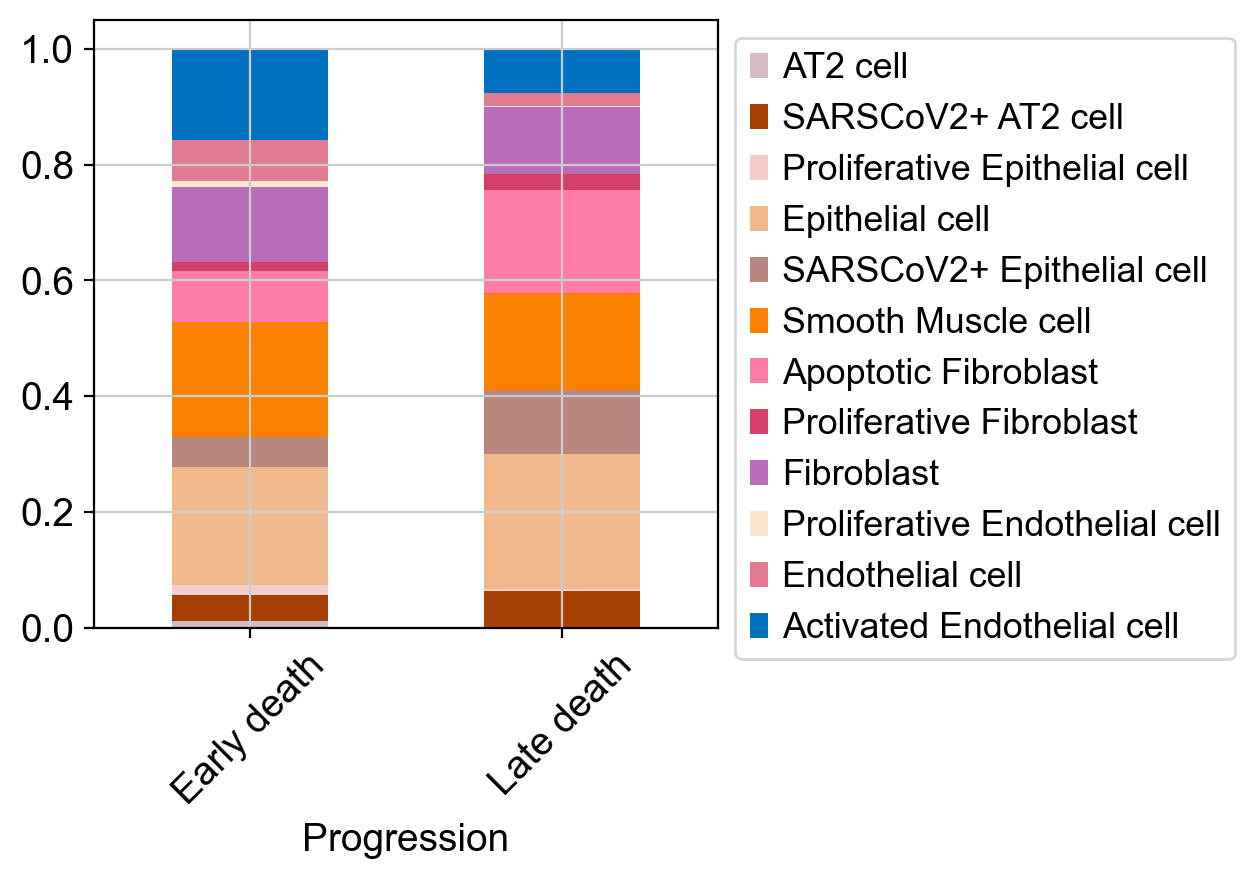

In [34]:
#color for stack bars for the disease groups matching the other bar graphs
#F08080 - light coral
#87CEFA - lightskyblue
#D3D3D3 - lightgrey

pretty_colors = ['#F08080','#87CEFA','#D3D3D3']
color_pal = sb.color_palette('Paired')

#sb.set_style("whitegrid", {'axes.grid' : True})
tmp4.plot.bar(stacked=True, color=colour_palette['colour'], figsize=(4, 4), rot=45).legend(bbox_to_anchor=(1, 1))
plt.savefig("Frequency_stromal_celltypes_Progression_reversed.pdf", format="pdf", bbox_inches="tight")

In [ ]:
# Alter this list with adata.obs variables that you want to plot against the resulting leiden population
image_var = 'ROI'

for i in ['Group']:

    mikeimc_v2.grouped_graph(adata_subset2,
                             ROI_id=image_var,
                             group_by_obs=i,
                             x_axis='pheno_cluster',
                             fig_size=(16,4),
                             log_scale=False, scale_factor=True,
                            display_tables=True) #If you change display_tables to True, will also do stats on the groups
    plt.show()

In [ ]:
compression_opts = dict(method='zip',
                         archive_name='All_clusters_number_per_ROI.csv') 
tmp.to_csv('out.zip', index=False, compression=compression_opts)

In [ ]:
#see how to increase the size of the dots
#edit dict colour
sb.set_style("white", {'axes.grid' : False})
graph = sb.lmplot(data = adata_subset2.obs, x = 'X_loc',y='Y_loc',hue ='pheno_cluster', palette = colour_palette['colour'], height = 8, col = 'ROI', col_wrap = 10,fit_reg = False)
graph.savefig('Mapped_all_clusters.png')

# Proportion comparisons analysis - scanpro

In [27]:
from scanpro import scanpro

In [ ]:
ad_covid_immune.obs['pheno_cluster_new']

In [30]:
out = scanpro(ad_covid_stromal, clusters_col='pheno_cluster_new', conds_col='Progression', samples_col='ROI')

[INFO] There are 2 conditions. T-Test will be performed...
[INFO] Done!


In [31]:
out.results

,baseline_props,mean_props_Early death,mean_props_Late death,prop_ratio,t_statistics,p_values,adjusted_p_values
clusters,,,,,,,
AT2 cell,0.010952,0.007126,0.002326,3.063102,-0.014370,0.988566,0.996555
Activated Endothelial cell,0.149648,0.139992,0.073887,1.894684,-0.004329,0.996555,0.996555
Apoptotic Fibroblast,0.095312,0.062848,0.109710,0.572856,-0.681015,0.497581,0.852996
Endothelial cell,0.066940,0.116890,0.030537,3.827749,2.187703,0.031238,0.187429
Epithelial cell,0.205448,0.178296,0.277894,0.641597,-1.509068,0.134725,0.323341
Fibroblast,0.128877,0.133046,0.107751,1.234756,-0.313096,0.754920,0.996555
Proliferative Endothelial cell,0.009111,0.007905,0.000897,8.813998,1.758885,0.081939,0.323341
Proliferative Epithelial cell,0.017325,0.013952,0.004081,3.418453,0.052266,0.958431,0.996555
Proliferative Fibroblast,0.016381,0.011983,0.020620,0.581121,-1.602349,0.112524,0.323341


In [ ]:
out.plot()

# Subset anndata to plot specfic cell types in COVID+ HIVneg vs COVID+ HIVpos

In [ ]:
adata_subset2.obs['cell_type']

In [ ]:
adata_subset2.obs['hierarchy']

In [ ]:
#Subset anndata object according to the HIV status in the COVID+ group
ad_HIV_POS = adata_subset2[adata_subset2.obs['Patient'].isin(['COS-03', 'COS-05', 'COS-06', 'COS-07', 'COS-08']),:].copy()
ad_HIV_NEG = adata_subset2[adata_subset2.obs['Patient'].isin(['COS-09',  'COS-012', 'COS-013', 'COS-015']),:].copy()

In [ ]:
ad_HIV_POS.write('./2_h5ad files/ad_HIV_POS')
ad_HIV_NEG.write('./2_h5ad files/ad_HIV_NEG')

Subset anndata object according to cell types

In [ ]:
# neutrophils
ad_neutro = adata_subset2[adata_subset2.obs['cell_type'].isin(['Neutrophil']),:].copy()

# macrophages
ad_macro = adata_subset2[adata_subset2.obs['cell_type'].isin(['Macrophage']),:].copy()

# lymphoid
ad_lymphoid = adata_subset2[adata_subset2.obs['hierarchy'].isin(['Lymphoid']),:].copy()

# epithelial
ad_epithelial = adata_subset2[adata_subset2.obs['cell_type'].isin(['Epithelial']),:].copy()

# stromal cells
ad_stromal = adata_subset2[adata_subset2.obs['cell_type'].isin(['Fibroblast', 'Smooth Muscle Cell'])].copy()

# endothelial cells
ad_endothelium = adata_subset2[adata_subset2.obs['cell_type'].isin(['Endothelium'])].copy()

#RBCs
ad_RBC = adata_subset2[adata_subset2.obs['cell_type'].isin(['RBCs'])].copy()

In [ ]:
ad_neutro.write('./2_h5ad files/adata_subset2_neutrophil')
ad_macro.write('./2_h5ad files/adata_subset2_macrophage')
ad_lymphoid.write('./2_h5ad files/adata_subset2_lymphoid')
ad_epithelial.write('./2_h5ad files/adata_subset2_epithelial')
ad_stromal.write('./2_h5ad files/adata_subset2_stromal')
ad_endothelium.write('./2_h5ad files/adata_subset2_endothelium')
ad_RBC.write('./2_h5ad files/adata_subset2_RBC')


In [ ]:
adata_COVID.write('./2_h5ad files/adata_COVID')

# Export data

In [ ]:
#Make a simplified dataframe to export
adata_export = adata_subset3.obs[['Case','ROI','Type','hierarchy','pheno_cluster']].copy()

In [ ]:
#Split up the X and Y columns from the adata
adata_export['X'], adata_export['Y'] = np.split(adata_subset3.obsm['spatial'],[-1],axis=1)
#Save to file
adata_export.to_csv('adata_cluster_export.csv')

In [ ]:
# export everything except the data using `.write_csvs`.
# Set `skip_data=False` if you also want to export the data.
adata_subset3.write_csvs(dirname='./', skip_data=False)